In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [13]:
import torch 
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
scaling_bool = True
# scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = False
pyTorch_bool = True

In [20]:
target_cols_direction = [True, True, True,]

In [378]:
epochs = 400

## 연령대 제한

In [22]:
len(raw)

1227553

In [23]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [24]:
len(raw)

1213899

In [25]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [26]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
                '총빌리루빈', '직접빌리루빈', '간접빌리루빈',
               ]

df = raw[cols]

In [27]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈
0,2010,7282,2520,1,42,1.7,0.3,None
1,2010,7490,3638,1,39,0.9,0.3,0.6
2,2010,7915,3997,1,36,1.4,None,None
3,2010,8056,4745,1,42,0.7,0.2,None
4,2010,8457,3929,1,38,1.9,None,None


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1213899 non-null  object
 1   UID        1213899 non-null  int64 
 2   CU_REC_ID  1213899 non-null  int64 
 3   SEX        1213899 non-null  int64 
 4   검진당시나이     1213899 non-null  int64 
 5   총빌리루빈      1049384 non-null  object
 6   직접빌리루빈     985030 non-null   object
 7   간접빌리루빈     776312 non-null   object
dtypes: int64(4), object(4)
memory usage: 74.1+ MB


In [29]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총빌리루빈', '직접빌리루빈',
       '간접빌리루빈'],
      dtype='object')

In [30]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [31]:
numeric_col = df.columns

In [32]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   총빌리루빈      1048488 non-null  float64
 6   직접빌리루빈     982545 non-null   float64
 7   간접빌리루빈     774951 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [34]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.048488e+06,982545.000000,774951.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,9.519317e-01,0.291530,0.626199
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,3.560269e+00,1.293952,0.568146
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,-2.900000e-01,-0.350000,-0.200000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,6.000000e-01,0.200000,0.400000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,8.000000e-01,0.230000,0.600000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.080000e+00,0.300000,0.800000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.553000e+03,547.000000,191.000000


In [35]:
df_result = df.copy()

# 이상치 제거

In [36]:
len(df_result)

1213899

In [37]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : -0.12000000000000022 maximum : 1.8000000000000003
총빌리루빈 : 1213899 / IQR outliers:  28106 / ratio : 0.023153491353069735

minimum : 0.050000000000000044 maximum : 0.44999999999999996
직접빌리루빈 : 1213899 / IQR outliers:  84880 / ratio : 0.06992344503125877

minimum : -0.20000000000000007 maximum : 1.4000000000000001
간접빌리루빈 : 1213899 / IQR outliers:  15652 / ratio : 0.012893988709110066



In [40]:
target_cols

['총빌리루빈', '직접빌리루빈', '간접빌리루빈']

In [41]:
minimums

[-0.12000000000000022, 0.050000000000000044, -0.20000000000000007]

In [42]:
maximums

[1.8000000000000003, 0.44999999999999996, 1.4000000000000001]

In [43]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120169 entries, 0 to 1120168
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1120169 non-null  int64  
 1   UID        1120169 non-null  int64  
 2   CU_REC_ID  1120169 non-null  int64  
 3   SEX        1120169 non-null  int64  
 4   검진당시나이     1120169 non-null  int64  
 5   총빌리루빈      954831 non-null   float64
 6   직접빌리루빈     890837 non-null   float64
 7   간접빌리루빈     721422 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 68.4 MB


In [44]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈
0,2010,7282,2520,1,42,1.7,0.3,NaN
1,2010,7490,3638,1,39,0.9,0.3,0.6
2,2010,7915,3997,1,36,1.4,NaN,NaN
3,2010,8056,4745,1,42,0.7,0.2,NaN
4,2010,11158,1703,1,37,0.8,0.2,0.6


In [45]:
len(df_result)

1120169

In [46]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120169 entries, 0 to 1120168
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1120169 non-null  int64  
 1   UID        1120169 non-null  int64  
 2   CU_REC_ID  1120169 non-null  int64  
 3   SEX        1120169 non-null  int64  
 4   검진당시나이     1120169 non-null  int64  
 5   총빌리루빈      954831 non-null   float64
 6   직접빌리루빈     890837 non-null   float64
 7   간접빌리루빈     721422 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 68.4 MB


In [377]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈
count,1.120169e+06,1.120169e+06,1.120169e+06,1.120169e+06,1.120169e+06,954831.000000,890837.000000,721422.000000
mean,2.021872e+03,5.110868e+05,1.500640e+06,1.383623e+00,4.059089e+01,0.821645,0.241027,0.579770
std,1.710110e+00,3.664607e+05,7.945879e+05,4.862681e-01,8.907893e+00,0.291796,0.086136,0.238274
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.060000,-0.200000
25%,2.021000e+03,2.217690e+05,6.819410e+05,1.000000e+00,3.400000e+01,0.600000,0.200000,0.400000
50%,2.022000e+03,3.818170e+05,1.447048e+06,1.000000e+00,4.000000e+01,0.800000,0.200000,0.560000
75%,2.023000e+03,8.396470e+05,2.180058e+06,2.000000e+00,4.700000e+01,1.000000,0.300000,0.700000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.800000,0.440000,1.400000


# target (건강지수) 계산

In [47]:
len(df_result)

1120169

## Linear Regression coefficient 계산

In [48]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [49]:
# target_cols

In [50]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [51]:
# df_man[df_man['target'].isna()]

In [52]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [53]:
# df_target = pd.concat([df_man, df_woman])

In [54]:
# len(df_target)

In [55]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [56]:
# len(df_target)

In [57]:
# df_target[df_target['target'].isna()]

In [58]:
# df_target.info()

In [59]:
# df_target.head()

In [60]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [61]:
# len(df_target)

In [62]:
# df_target.describe()

In [63]:
# df_target[df_target['target'] == 50]

In [64]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [65]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [66]:
# len(df_target)

In [67]:
# df_target.head()

In [68]:
# df_target.info()

## gaussian_kde

In [69]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈
0,2010,7282,2520,1,42,1.7,0.3,NaN
1,2010,7490,3638,1,39,0.9,0.3,0.6
2,2010,7915,3997,1,36,1.4,NaN,NaN
3,2010,8056,4745,1,42,0.7,0.2,NaN
4,2010,11158,1703,1,37,0.8,0.2,0.6


In [70]:
target_cols

['총빌리루빈', '직접빌리루빈', '간접빌리루빈']

In [71]:
len(target_cols)

3

In [72]:
target_cols_direction

[True, True, True]

In [73]:
def kde_col(df, cols):
    
    threshold = 100
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)    
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data2 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
            
        for index, col in enumerate(cols):
#             print(col)
        
            input_data = tmp_data2[col].copy()
            input_data.fillna(input_data.mean().round(0), inplace=True)

            input_data = input_data.sort_values()

            # kde 모델
            kde = gaussian_kde(input_data)
            result = kde(input_data)
            max_value = result.max()            
            
            df_col = df_temp[col].copy()
            df_col.fillna(df_col.mean().round(0), inplace=True)
            
            # 방향성이 있을 경우
            max_idx = result.argmax()  # 최대값의 인덱스
            std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

            arr = []

            temp = pd.DataFrame(kde(df_col), columns=['kde'])
            
            if target_cols_direction[index]:
                # center right
                temp['trigger'] = (df_col >= std_value)
            else:
                # center left
                temp['trigger'] = (df_col < std_value)
                
            temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                              for idx, trigger in temp['trigger'].iteritems()]
                                
#             temp['gap'] = abs(temp['output'] - threshold)            
#             a = 11
#             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
#             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]
            
            temp[col + '_kde'] = temp['output']
            temp[col + '_kde'] = temp[col + '_kde'].round(2)
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [74]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

594.45310 sec


In [75]:
df_target['kde_mean'].min()

2.04

In [76]:
df_target['kde_mean'].max()

196.04

## Target Scaling

In [77]:
df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))

In [78]:
df_target['target'] = (df_target['target'] * 100) + 50

In [79]:
df_target['target'] = df_target['target'].round(0)

In [80]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
99,50.0,17
97,51.0,151
90,52.0,1115
91,53.0,1112
93,54.0,833
83,55.0,1648
65,56.0,2681
63,57.0,2735
76,58.0,1986
87,59.0,1456


In [81]:
df_target['target'].min()

50.0

In [82]:
df_target['target'].max()

150.0

## Target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

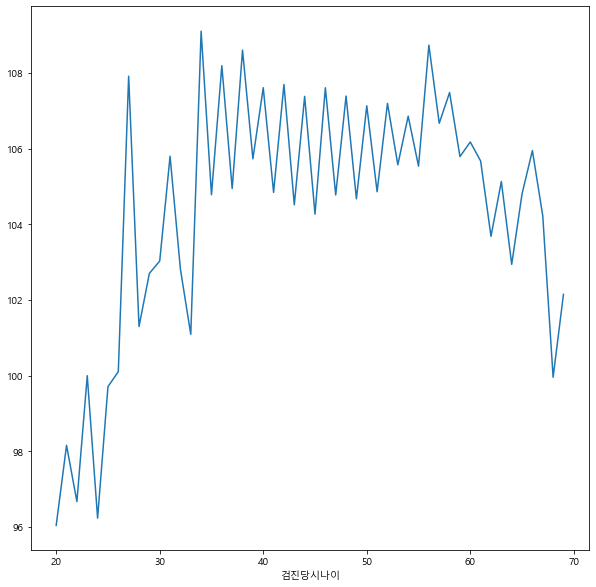

In [83]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

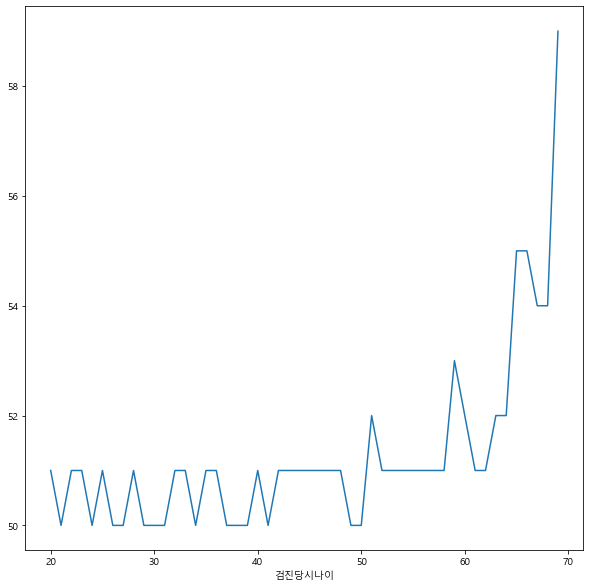

In [84]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

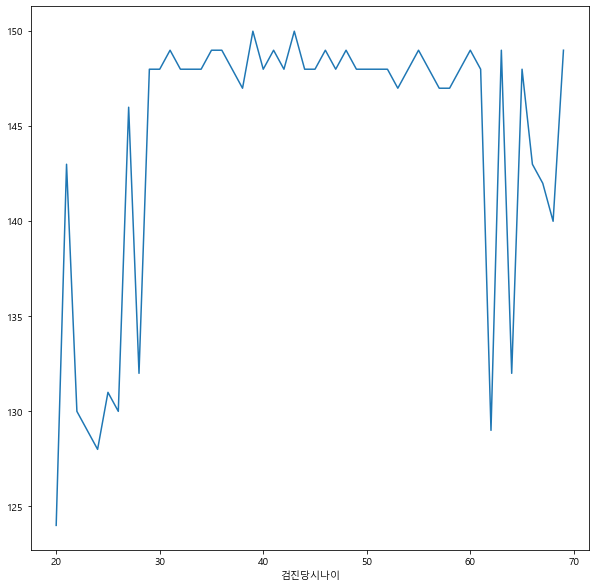

In [85]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [86]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
291451,2010,609272,143,1,40,0.61,0.12,NaN,154.64,175.00,100.0,143.21,123.0
575837,2010,585711,154,1,52,0.92,0.21,NaN,123.25,96.65,100.0,106.63,104.0
485757,2010,593983,156,1,48,0.85,0.23,NaN,140.29,72.59,100.0,104.29,103.0
266336,2010,612330,185,1,39,1.20,0.30,NaN,33.66,87.63,100.0,73.76,87.0
23663,2010,645901,212,1,28,0.80,0.20,NaN,164.00,76.05,100.0,113.35,107.0


# 결측행 제거

In [87]:
# df_result.dropna(axis=0).info()

In [88]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [89]:
df_target['SEX'].value_counts()

1    690446
2    429723
Name: SEX, dtype: int64

In [90]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

690446

In [91]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
291451,2010,609272,143,1,40,0.61,0.12,NaN,154.64,175.00,100.0,143.21,123.0
575837,2010,585711,154,1,52,0.92,0.21,NaN,123.25,96.65,100.0,106.63,104.0
485757,2010,593983,156,1,48,0.85,0.23,NaN,140.29,72.59,100.0,104.29,103.0
266336,2010,612330,185,1,39,1.20,0.30,NaN,33.66,87.63,100.0,73.76,87.0
23663,2010,645901,212,1,28,0.80,0.20,NaN,164.00,76.05,100.0,113.35,107.0


# 결측치 처리

## 결측치 삭제

In [92]:
# df_man.dropna(inplace=True)

In [93]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
291451,2010,609272,143,1,40,0.61,0.12,NaN,154.64,175.00,100.0,143.21,123.0
575837,2010,585711,154,1,52,0.92,0.21,NaN,123.25,96.65,100.0,106.63,104.0
485757,2010,593983,156,1,48,0.85,0.23,NaN,140.29,72.59,100.0,104.29,103.0
266336,2010,612330,185,1,39,1.20,0.30,NaN,33.66,87.63,100.0,73.76,87.0
23663,2010,645901,212,1,28,0.80,0.20,NaN,164.00,76.05,100.0,113.35,107.0


## 결측치 평균으로 대체

In [94]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [95]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [96]:
target_cols

['총빌리루빈', '직접빌리루빈', '간접빌리루빈']

In [97]:
len(df_man)

690446

In [98]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [99]:
len(df_man)

589496

In [100]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
291451,2010,609272,143,1,40,0.61,0.12,NaN,154.64,175.00,100.0,143.21,123.0
575837,2010,585711,154,1,52,0.92,0.21,NaN,123.25,96.65,100.0,106.63,104.0
485757,2010,593983,156,1,48,0.85,0.23,NaN,140.29,72.59,100.0,104.29,103.0
266336,2010,612330,185,1,39,1.20,0.30,NaN,33.66,87.63,100.0,73.76,87.0
23663,2010,645901,212,1,28,0.80,0.20,NaN,164.00,76.05,100.0,113.35,107.0


## fillna

In [101]:
df_man.mean().round(2)

검진년도             2022.02
UID            513443.65
CU_REC_ID     1464308.86
SEX                 1.00
검진당시나이             42.25
총빌리루빈               0.88
직접빌리루빈              0.26
간접빌리루빈              0.63
총빌리루빈_kde         109.44
직접빌리루빈_kde         89.50
간접빌리루빈_kde        142.59
kde_mean          113.84
target            107.62
dtype: float64

In [102]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [103]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [104]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [105]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 스크리닝

## 간접빌리루빈 스크리닝

In [106]:
screening = 0

In [107]:
df_man[df_man['간접빌리루빈'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
517755,2022,112632,1454579,1,49,0.88,0.39,-0.2,100.0,32.24,200.0,110.75,106.0


In [108]:
len(df_man[df_man['간접빌리루빈'] < screening])

1

In [109]:
df_man.loc[df_man['간접빌리루빈'] < screening, '간접빌리루빈'] = screening

In [110]:
df_man[df_man['간접빌리루빈'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target


In [111]:
len(df_man[df_man['간접빌리루빈'] < screening])

0

In [112]:
len(df_man)

589496

# 중복 제거

In [113]:
len(df_man)

589496

In [114]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [115]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
2213,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0
597772,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0
634725,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0
292056,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0
324021,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0
352958,2021,62,699357,1,42,1.01,0.22,0.79,98.38,87.01,178.50,121.30,111.0
382336,2022,62,1356310,1,43,0.86,0.26,0.60,124.39,46.80,157.46,109.55,105.0
411479,2023,62,2170394,1,44,1.10,0.30,0.74,50.90,76.40,174.84,100.71,101.0
554556,2019,67,410099,1,51,0.54,0.20,0.63,148.29,100.00,100.00,116.10,109.0
577943,2020,67,481109,1,52,0.83,0.27,0.63,134.49,71.54,100.00,102.01,102.0


In [116]:
len(df_man)

589496

In [117]:
df_man[target_cols]

,총빌리루빈,직접빌리루빈,간접빌리루빈
2213,1.10,0.26,0.63
597772,0.90,0.20,0.70
634725,0.90,0.10,0.80
292056,0.97,0.20,0.77
324021,0.93,0.20,0.73
...,...,...,...
689061,0.50,0.20,0.30
689060,0.50,0.20,0.30
49659,1.00,0.30,0.70
11414,0.90,0.30,0.60


## first만 남겨두고 중복 제거

In [118]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [119]:
len(df_man)

532766

In [120]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
2213,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0
597772,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0
634725,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0
292056,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0
324021,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0
352958,2021,62,699357,1,42,1.01,0.22,0.79,98.38,87.01,178.50,121.30,111.0
382336,2022,62,1356310,1,43,0.86,0.26,0.60,124.39,46.80,157.46,109.55,105.0
411479,2023,62,2170394,1,44,1.10,0.30,0.74,50.90,76.40,174.84,100.71,101.0
554556,2019,67,410099,1,51,0.54,0.20,0.63,148.29,100.00,100.00,116.10,109.0
577943,2020,67,481109,1,52,0.83,0.27,0.63,134.49,71.54,100.00,102.01,102.0


In [121]:
df_man.reset_index(drop=True, inplace=True)

In [122]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
0,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0
1,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0
2,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0
3,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0
4,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0


In [123]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532766 entries, 0 to 532765
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   검진년도        532766 non-null  int64  
 1   UID         532766 non-null  int64  
 2   CU_REC_ID   532766 non-null  int64  
 3   SEX         532766 non-null  int64  
 4   검진당시나이      532766 non-null  int64  
 5   총빌리루빈       532766 non-null  float64
 6   직접빌리루빈      532766 non-null  float64
 7   간접빌리루빈      532766 non-null  float64
 8   총빌리루빈_kde   532766 non-null  float64
 9   직접빌리루빈_kde  532766 non-null  float64
 10  간접빌리루빈_kde  532766 non-null  float64
 11  kde_mean    532766 non-null  float64
 12  target      532766 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 52.8 MB


# 데이터 Sampling

In [124]:
len(df_man)

532766

In [125]:
df_man['target'].min()

51.0

In [126]:
df_man['target'].max()

150.0

## 150보다 큰 data 삭제

In [127]:
# df_man.drop(df_man[df_man['target'] > 150].index, inplace=True)

## 50보다 작은 data 삭제

In [128]:
# df_man.drop(df_man[df_man['target'] < 50].index, inplace=True)

In [129]:
len(df_man)

532766

In [130]:
# df_man_sample = pd.DataFrame()

# for age in range(int(df_man['target'].min()), 100):
#     print(age, 200 - age)
#     print(len(df_man[df_man['target'] == age]), len(df_man[df_man['target'] == (200 - age)]))

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

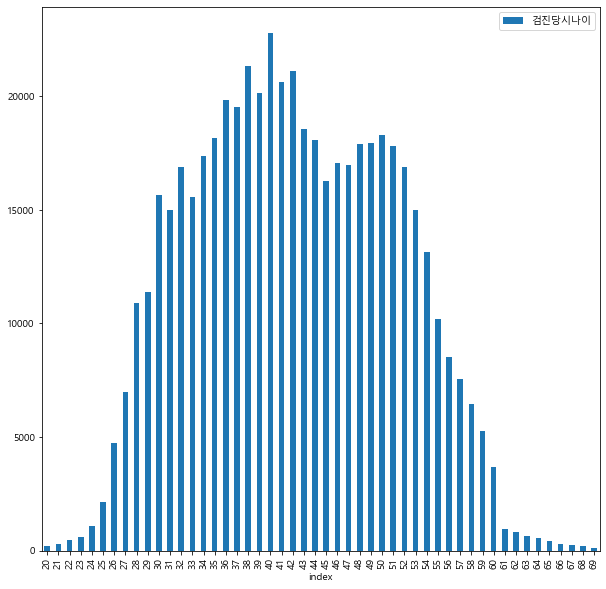

In [131]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [132]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,180
45,21,271
42,22,455
40,23,597
36,24,1083
35,25,2151
33,26,4736
30,27,7003
26,28,10885
25,29,11401


# 검진항목 시각화

In [133]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
count,532766.000000,5.327660e+05,5.327660e+05,532766.0,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.00000
mean,2021.948475,5.062342e+05,1.436080e+06,1.0,42.147573,0.887399,0.254144,0.628643,108.670534,89.925632,142.626413,113.740974,107.57089
std,1.642915,3.609424e+05,8.170475e+05,0.0,8.791503,0.289456,0.080786,0.206137,52.408318,36.750157,41.387201,33.012152,17.01816
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,0.000000,0.060000,0.000000,0.230000,9.870000,0.040000,4.230000,51.00000
25%,2021.000000,2.221110e+05,6.214795e+05,1.0,35.000000,0.700000,0.200000,0.500000,61.300000,73.560000,100.000000,95.920000,98.00000
50%,2022.000000,3.807555e+05,1.351756e+06,1.0,42.000000,0.870000,0.260000,0.630000,124.870000,91.100000,162.040000,119.530000,111.00000
75%,2023.000000,8.322930e+05,2.163220e+06,1.0,49.000000,1.100000,0.300000,0.700000,146.660000,100.000000,171.070000,135.390000,119.00000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,1.800000,0.440000,1.400000,200.000000,191.980000,200.000000,196.040000,150.00000


<AxesSubplot:xlabel='검진당시나이'>

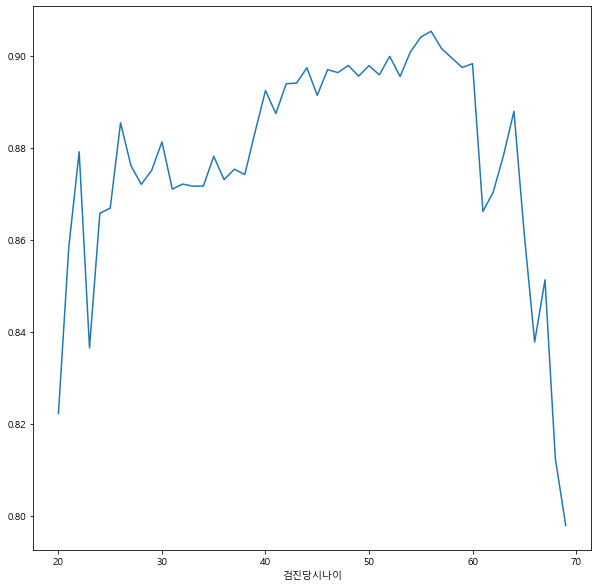

In [134]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

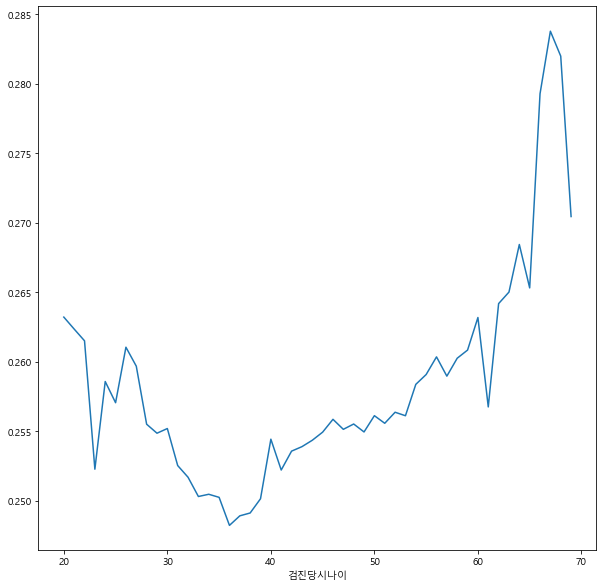

In [135]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

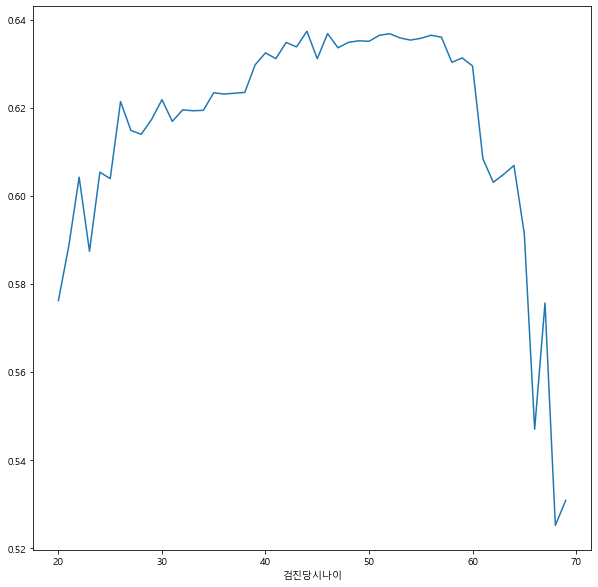

In [136]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

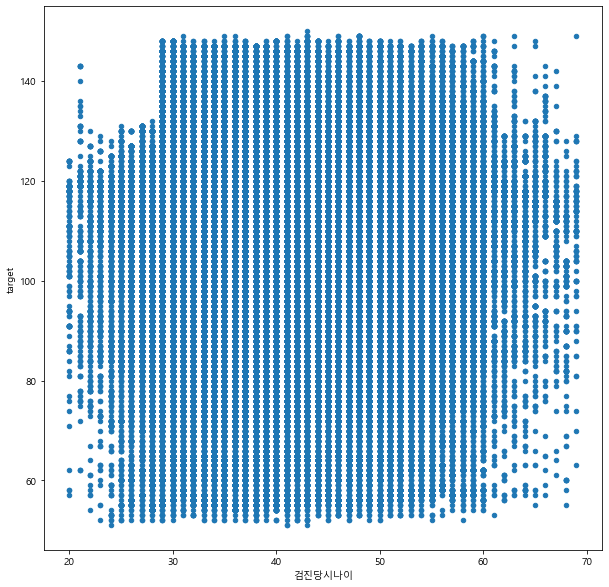

In [137]:
df_man.plot.scatter(x='검진당시나이', y='target')

<AxesSubplot:xlabel='index'>

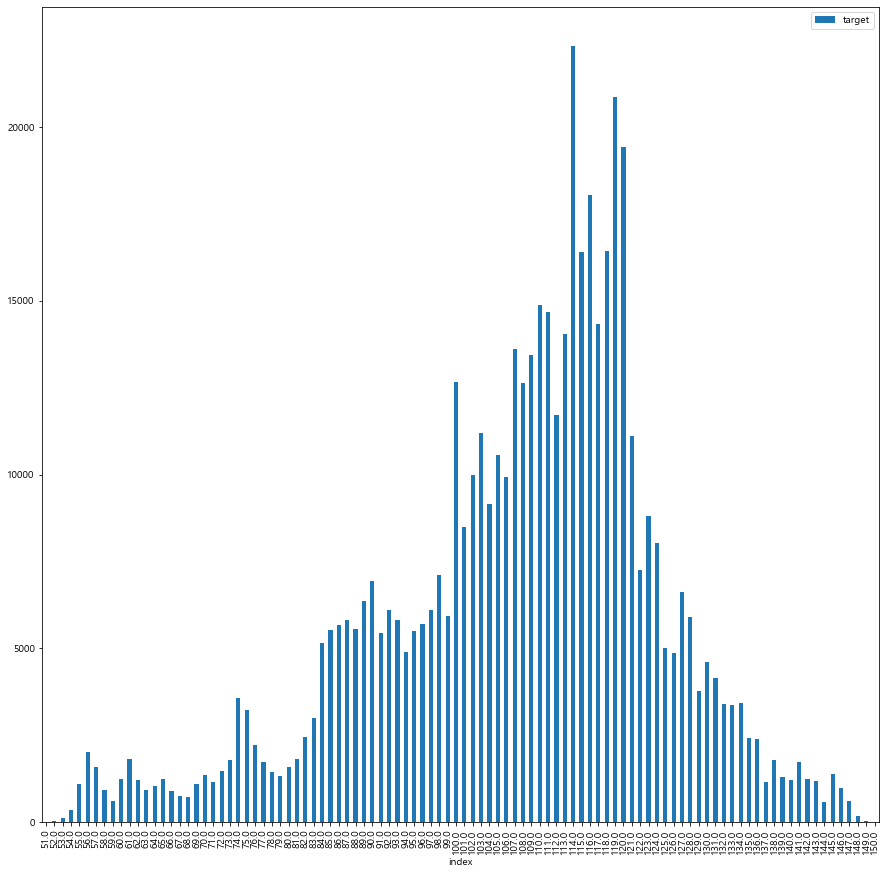

In [138]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [139]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,4
96,52.0,50
95,53.0,110
93,54.0,366
82,55.0,1098
58,56.0,2011
65,57.0,1597
85,58.0,928
91,59.0,612
75,60.0,1235


# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

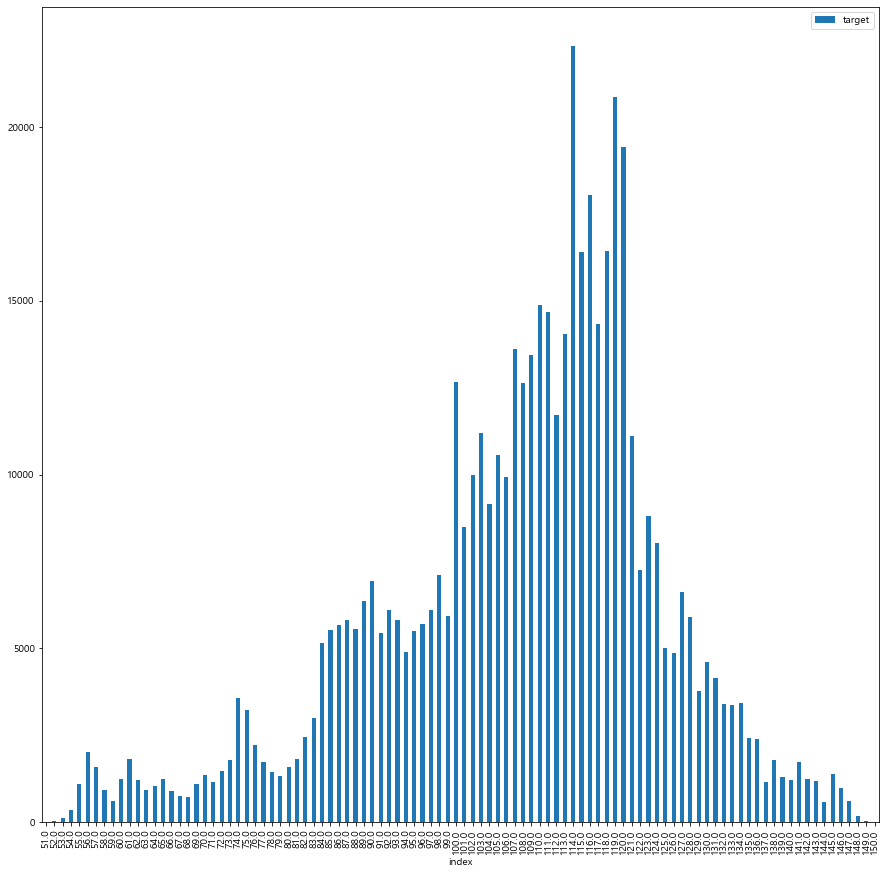

In [140]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [141]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,4
96,52.0,50
95,53.0,110
93,54.0,366
82,55.0,1098
58,56.0,2011
65,57.0,1597
85,58.0,928
91,59.0,612
75,60.0,1235


In [142]:
df_man_sampling = pd.DataFrame()

for target in range(int(df_man['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [143]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

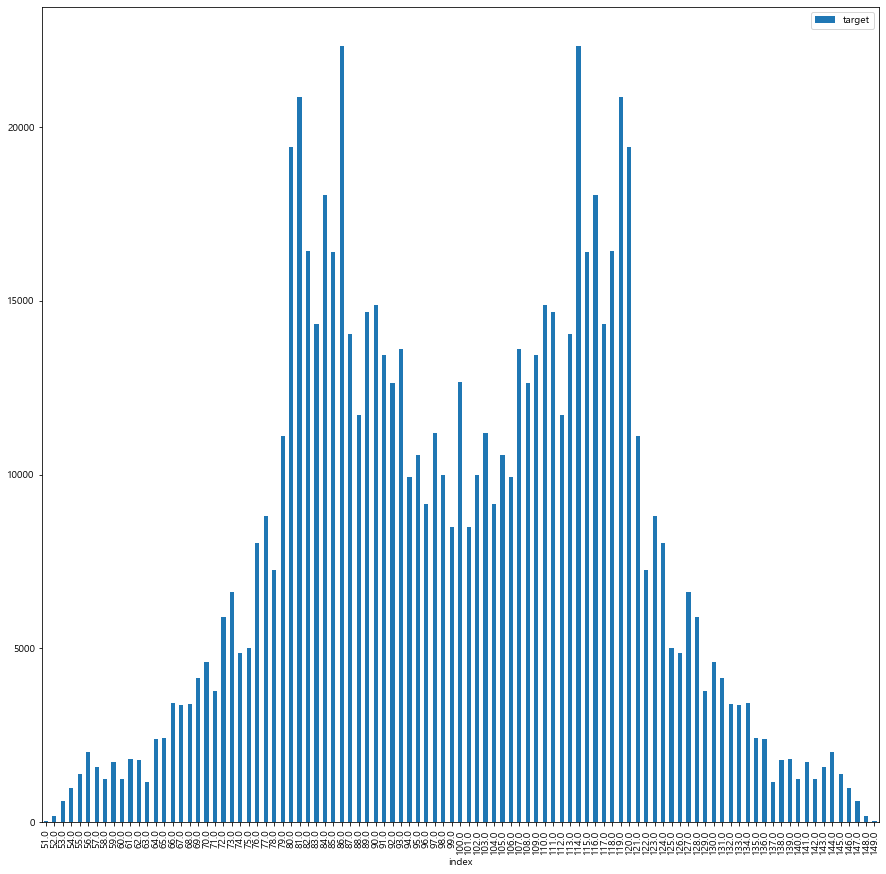

In [144]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [145]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,29
95,52.0,183
94,53.0,617
92,54.0,993
83,55.0,1387
74,56.0,2011
82,57.0,1597
86,58.0,1253
80,59.0,1739
88,60.0,1235


# 나이별 확인하기

In [146]:
target = 'target'

In [147]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [148]:
# df_man = df_man_sample

In [149]:
# int(df_man['검진당시나이'].value_counts().mean())

In [150]:
# df_man['검진당시나이'].min()

In [151]:
# df_man['검진당시나이'].max()

In [152]:
# df_man.columns

In [153]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [154]:
# df_temp.info()

In [155]:
# df_temp.reset_index(drop=True, inplace=True)

In [156]:
# df_man = df_temp.copy()

In [157]:
# df_man['검진당시나이'].value_counts()

In [158]:
# df_man[df_man['검진당시나이']==38]

In [159]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [160]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총빌리루빈', '직접빌리루빈',
       '간접빌리루빈', '총빌리루빈_kde', '직접빌리루빈_kde', '간접빌리루빈_kde', 'kde_mean',
       'target'],
      dtype='object')

In [161]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [162]:
target_cols

['총빌리루빈', '직접빌리루빈', '간접빌리루빈']

In [163]:
train_columns = target_cols

In [164]:
target_col = 'target'

## Min Max Scaling

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_sampling_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)
    
    data_scaler2 = scaler.fit_transform(df_man[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler2, columns=train_columns)

## train_test_split

In [167]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [168]:
# model = LinearRegression()

In [169]:
# model.fit(X_train, y_train)

In [170]:
# model.intercept_

In [171]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [172]:
# model = XGBRegressor()

In [173]:
# # A parameter grid for XGBoost
# params = {
#     'n_estimators':[500],
# #     'min_child_weight':[4,5], 
# #     'gamma':[i/10.0 for i in range(3,6)],  
# #     'subsample':[i/10.0 for i in range(6,11)],
# #     'colsample_bytree':[i/10.0 for i in range(6,11)], 
# #     'max_depth': [2,3,4,6,7],
#     'objective': ['reg:squarederror', 'reg:tweedie'],
#     'booster': ['gbtree', 'gblinear'],
#     'eval_metric': ['rmse'],
#     'eta': [i/10.0 for i in range(3,6)],
# }

In [174]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [175]:
# import time
# start = time.time()
# random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

In [176]:
# # best parameter
# random_search.best_params_

In [177]:
# # best score
# random_search.best_score_

In [178]:
# model = random_search.best_estimator_
# model

## Keras

In [179]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [180]:
# model = build_model()

In [181]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [182]:
# model.summary()

In [183]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [184]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [185]:
# plot_history(history)

## pyTorch 신경망

In [186]:
np.shape(X_train)[1]

3

In [187]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(np.shape(X_train)[1], 512) #첫 번째 레이어 
        self.fc2 = nn.Linear(512, 128) #두 번째 레이어
        self.fc3 = nn.Linear(128, 16) #세 번째 레이어
        self.fc4 = nn.Linear(16, 1) #출력 레이어 
#         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
#         self.relu = nn.ReLU()
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #활성화 함수 적용                 
#         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
        x = F.relu(self.fc2(x)) #활성화 함수 적용 
        x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
        x = self.fc4(x)
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.relu(x)
        return x

In [188]:
model = Regressor()
reg_loss = nn.MSELoss()
# reg_loss = nn.L1Loss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
optimizer = optim.Adam(model.parameters())
# optimizer = optim.SGD(model.parameters(), momentum=0.9)
# optimizer = optim.SGD(model.parameters())

In [189]:
# epochs = 5000

In [190]:
X_train  = torch.Tensor(X_train.to_numpy())
X_test  = torch.Tensor(X_test.to_numpy())
y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [191]:
import time
start = time.time()

losses = []

# 총 100번의 에포크 동안 모델 학습
for epoch in range(epochs):
    optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
    loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

    # 50번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

    # 손실 값을 리스트에 추가하여 추적
    losses.append(loss.item())

end = time.time()
print(f"{end - start:.5f} sec")

Epoch    0/1000 Cost: 10391.926758
Epoch   10/1000 Cost: 10192.991211
Epoch   20/1000 Cost: 9853.430664
Epoch   30/1000 Cost: 9239.030273
Epoch   40/1000 Cost: 8220.113281
Epoch   50/1000 Cost: 6690.104492
Epoch   60/1000 Cost: 4680.621094
Epoch   70/1000 Cost: 2582.616699
Epoch   80/1000 Cost: 1245.765747
Epoch   90/1000 Cost: 1075.146851
Epoch  100/1000 Cost: 1046.639648
Epoch  110/1000 Cost: 933.759521
Epoch  120/1000 Cost: 884.148376
Epoch  130/1000 Cost: 833.576843
Epoch  140/1000 Cost: 787.817932
Epoch  150/1000 Cost: 744.340454
Epoch  160/1000 Cost: 701.437134
Epoch  170/1000 Cost: 659.260376
Epoch  180/1000 Cost: 617.202209
Epoch  190/1000 Cost: 575.427734
Epoch  200/1000 Cost: 533.952637
Epoch  210/1000 Cost: 492.860809
Epoch  220/1000 Cost: 452.284912
Epoch  230/1000 Cost: 412.396698
Epoch  240/1000 Cost: 373.433716
Epoch  250/1000 Cost: 335.685516
Epoch  260/1000 Cost: 299.475647
Epoch  270/1000 Cost: 265.143768
Epoch  280/1000 Cost: 232.937759
Epoch  290/1000 Cost: 203.2203

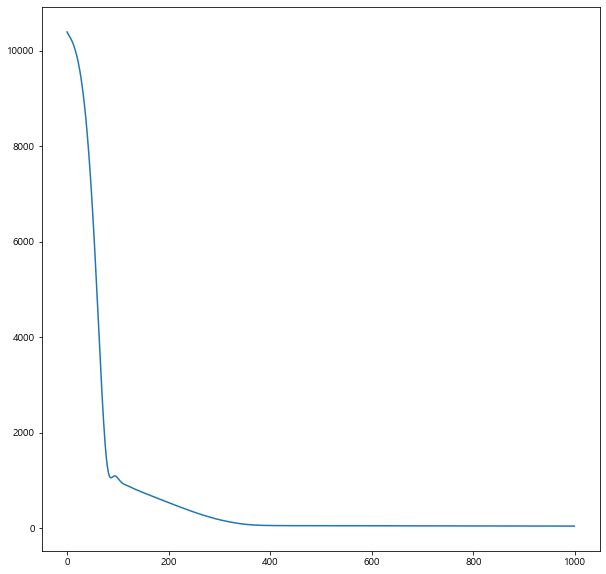

In [192]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(losses)

## coef 계산

In [193]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [194]:
# df_coef.columns = ['검사항목', 'coef']

In [195]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [196]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [197]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [198]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [199]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [200]:
# slr = LinearRegression()

In [201]:
# slr.fit(X_train_poly, y_train)

In [202]:
# np.shape(X_train)

In [203]:
# np.shape(X_train_poly)

In [204]:
# np.shape(X_test)

In [205]:
# np.shape(X_test_poly)

In [206]:
# y_pred_poly = slr.predict(X_test_poly)

In [207]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [208]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [209]:
# model_path = './model/03/11/20/best_estimator.pkl'

In [210]:
# import pickle
# with open(model_path,'wb') as f:
#     pickle.dump(model, f)

In [211]:
# with open(model_path, 'rb') as f:
#     model = pickle.load(f) 

In [212]:
# Get predictions
# y_pred = model.predict(X_test)

# 성능 평가

## pyTorch 예측

In [213]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [214]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [215]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 5.3976674
MSE : 42.71939
RMSE : 6.5360074


In [216]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8795206669109727

In [217]:
if XGB_bool:
    model.score(X_test, y_test)

## feature importance

In [218]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model)

# 실제지수 - 예측지수 결과

In [219]:
pd.DataFrame(y_test).reset_index(drop=True)

,0
0,65.0
1,104.0
2,94.0
3,69.0
4,84.0
...,...
194636,116.0
194637,120.0
194638,124.0
194639,97.0


In [220]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,60.170433
1,97.982735
2,105.585609
3,71.846138
4,77.533752
...,...
194636,109.222694
194637,114.787582
194638,125.613747
194639,88.805458


In [221]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [222]:
df_test.head()

,0,0
0,65.0,60.170433
1,104.0,97.982735
2,94.0,105.585609
3,69.0,71.846138
4,84.0,77.533752


In [223]:
df_test.columns

Int64Index([0, 0], dtype='int64')

In [224]:
df_test.columns = ['실제지수', '예측지수']

In [225]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [226]:
df_test.head()

,실제지수,예측지수,diff
0,65.0,60.170433,-4.829567
1,104.0,97.982735,-6.017265
2,94.0,105.585609,11.585609
3,69.0,71.846138,2.846138
4,84.0,77.533752,-6.466248


In [227]:
df_test['diff_int'] = df_test['diff'].round(0)

In [228]:
len(df_test)

194641

In [229]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,65.0,60.170433,-4.829567,-5.0
1,104.0,97.982735,-6.017265,-6.0
2,94.0,105.585609,11.585609,12.0
3,69.0,71.846138,2.846138,3.0
4,84.0,77.533752,-6.466248,-6.0


<AxesSubplot:>

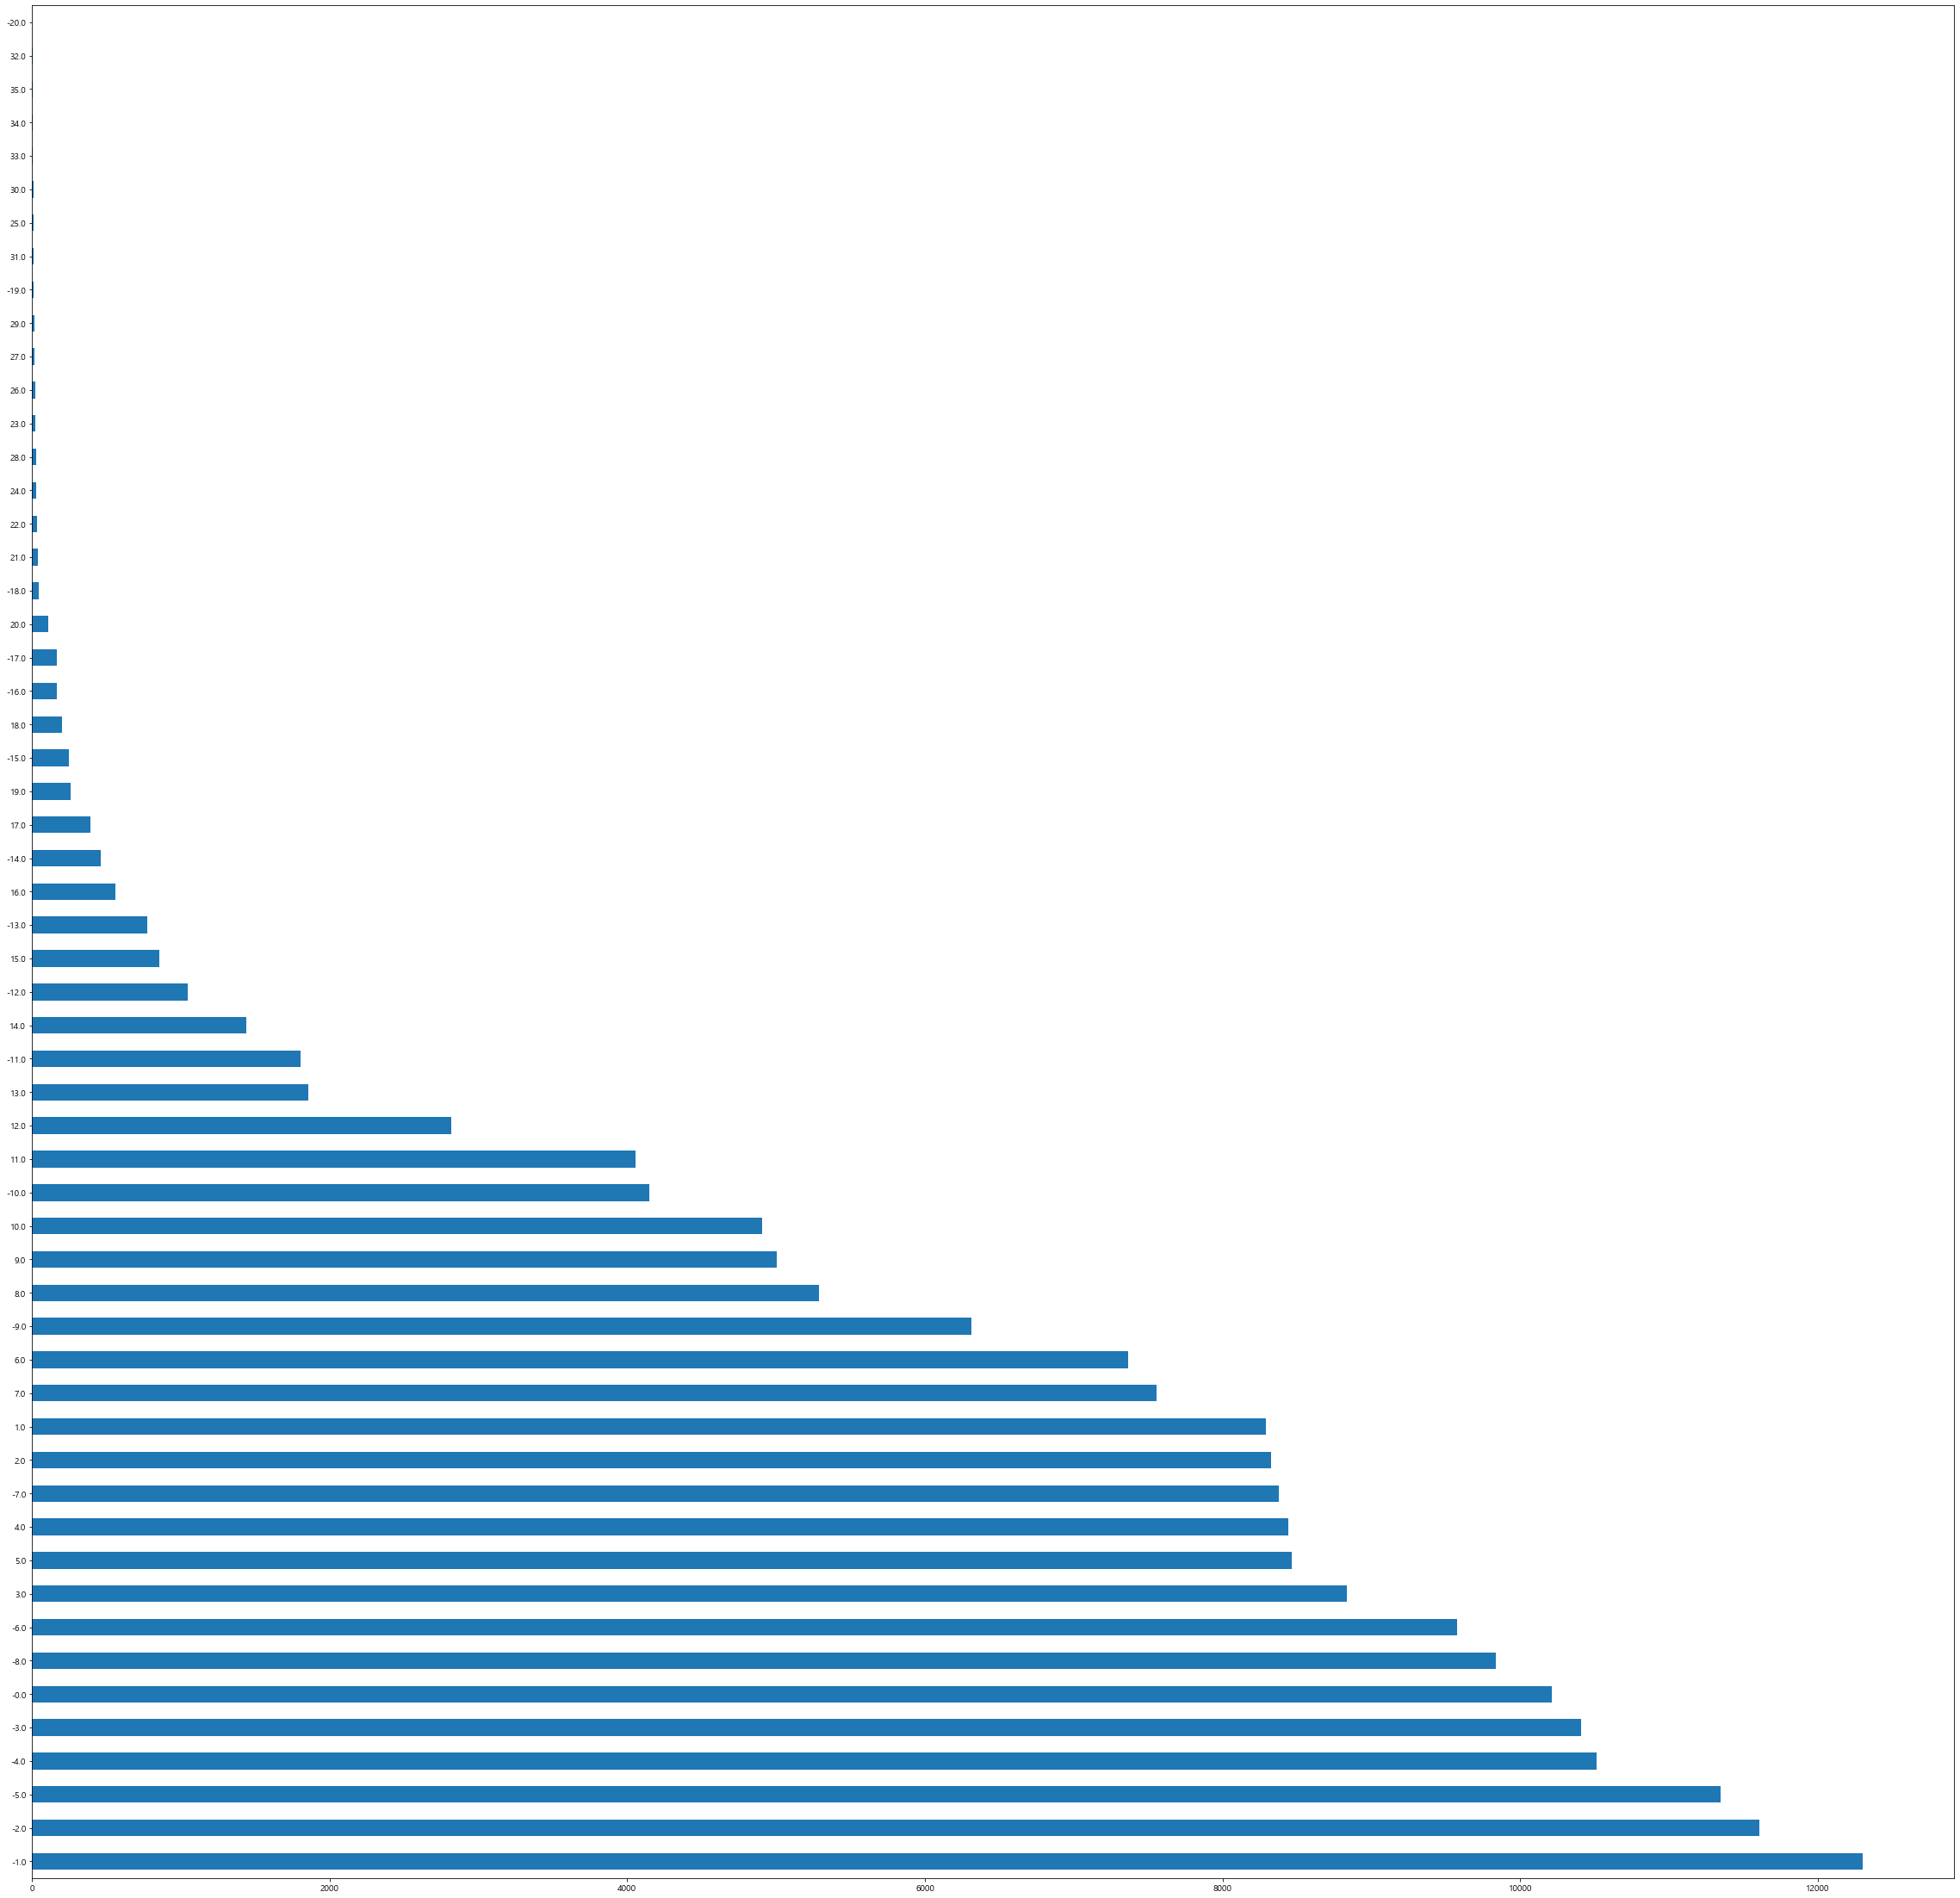

In [230]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [231]:
df_test['diff_int'].value_counts(ascending=False)

-1.0     12301
-2.0     11608
-5.0     11349
-4.0     10516
-3.0     10409
-0.0     10211
-8.0      9838
-6.0      9576
 3.0      8838
 5.0      8462
 4.0      8439
-7.0      8378
 2.0      8325
 1.0      8290
 7.0      7557
 6.0      7364
-9.0      6314
 8.0      5288
 9.0      5006
 10.0     4907
-10.0     4149
 11.0     4056
 12.0     2817
 13.0     1858
-11.0     1805
 14.0     1439
-12.0     1045
 15.0      854
-13.0      772
 16.0      561
-14.0      460
 17.0      393
 19.0      259
-15.0      245
 18.0      204
-16.0      166
-17.0      164
 20.0      109
-18.0       46
 21.0       37
 22.0       33
 24.0       29
 28.0       27
 23.0       24
 26.0       23
 27.0       15
 29.0       14
-19.0       13
 31.0       12
 25.0       10
 30.0       10
 33.0        6
 34.0        4
 35.0        3
 32.0        2
-20.0        1
Name: diff_int, dtype: int64

In [232]:
df_test['예측지수'].round(0).value_counts()

81.0     10471
91.0      7657
115.0     7212
119.0     6824
89.0      6410
122.0     6144
86.0      6073
106.0     5914
111.0     5835
109.0     5787
100.0     5353
95.0      4889
113.0     4344
87.0      4027
96.0      3972
105.0     3904
126.0     3889
98.0      3644
83.0      3177
75.0      3076
74.0      3057
117.0     2889
85.0      2811
108.0     2789
90.0      2778
101.0     2661
103.0     2660
112.0     2479
79.0      2421
94.0      2375
114.0     2303
107.0     2219
118.0     2210
93.0      2161
121.0     2040
80.0      1941
76.0      1886
132.0     1858
92.0      1839
88.0      1825
129.0     1802
78.0      1725
116.0     1718
110.0     1682
120.0     1678
84.0      1678
124.0     1578
128.0     1554
82.0      1545
135.0     1365
125.0     1350
123.0     1282
104.0     1227
67.0      1224
77.0      1195
99.0      1174
97.0      1140
68.0      1103
102.0     1073
72.0      1065
73.0      1060
127.0     1030
70.0      1029
130.0      802
62.0       694
138.0      567
69.0      

# 예측 나이 분포

In [233]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [234]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [235]:
df_train.round(0).value_counts()

81.0     32080
91.0     23030
115.0    21346
119.0    20179
89.0     19018
122.0    18926
86.0     18553
106.0    17591
111.0    17383
109.0    17351
100.0    16174
95.0     14304
113.0    12950
87.0     12191
96.0     12085
126.0    11693
105.0    11679
98.0     10634
83.0      9411
75.0      9234
74.0      9072
117.0     9057
108.0     8372
90.0      8362
85.0      8355
101.0     8110
103.0     7682
112.0     7467
94.0      7291
114.0     7200
79.0      7166
118.0     6896
107.0     6804
93.0      6231
121.0     5836
80.0      5816
76.0      5563
88.0      5547
132.0     5519
129.0     5462
92.0      5337
116.0     5295
120.0     5216
78.0      5187
84.0      5049
110.0     4940
82.0      4643
128.0     4572
124.0     4543
125.0     4148
135.0     4084
123.0     3855
77.0      3727
67.0      3688
104.0     3521
99.0      3432
97.0      3408
68.0      3260
73.0      3253
127.0     3198
70.0      3168
72.0      3162
102.0     3096
130.0     2398
62.0      2089
138.0     1696
69.0      

In [236]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [237]:
y_test.value_counts()

114.0    5621
86.0     5549
81.0     5238
119.0    5201
120.0    4813
80.0     4775
116.0    4660
84.0     4548
82.0     4138
115.0    4103
85.0     4084
118.0    4060
111.0    3736
90.0     3710
110.0    3704
89.0     3662
83.0     3594
87.0     3586
117.0    3572
113.0    3499
93.0     3377
91.0     3373
109.0    3368
107.0    3354
92.0     3193
100.0    3113
108.0    3071
88.0     2949
112.0    2915
97.0     2850
103.0    2787
121.0    2750
79.0     2711
105.0    2685
95.0     2597
98.0     2529
102.0    2469
94.0     2455
106.0    2438
104.0    2335
96.0     2243
77.0     2179
101.0    2177
123.0    2133
99.0     2106
124.0    2022
76.0     2001
78.0     1838
122.0    1795
73.0     1702
127.0    1627
128.0    1523
72.0     1510
125.0    1242
75.0     1237
74.0     1219
126.0    1199
70.0     1138
130.0    1132
69.0     1057
131.0    1008
129.0     979
71.0      953
132.0     865
66.0      862
67.0      841
133.0     836
134.0     834
68.0      830
65.0      654
135.0     624
136.0 

In [238]:
df_plot = pd.DataFrame(y_test.value_counts())

In [239]:
df_plot.columns = ['count']

In [240]:
df_plot.reset_index(inplace=True)

In [241]:
df_plot = df_plot.sort_values(0, ascending=True)

In [242]:
df_plot.columns = ['index', 'count']

In [243]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

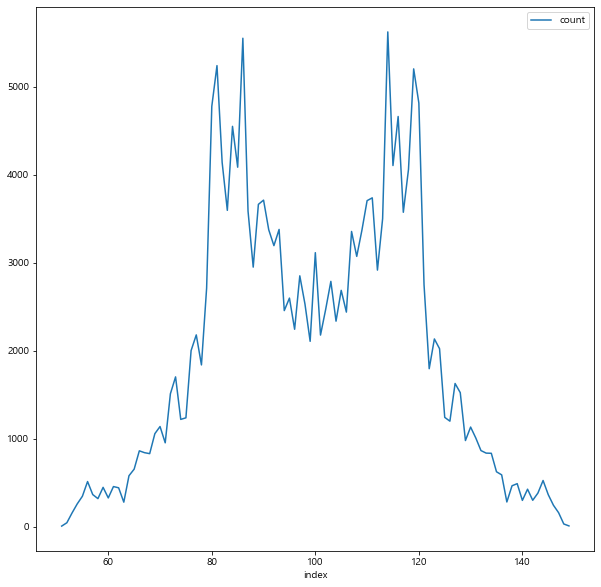

In [244]:
df_plot.plot()

In [245]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [246]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [247]:
df_test.round(0).value_counts()

81.0     10471
91.0      7657
115.0     7212
119.0     6824
89.0      6410
122.0     6144
86.0      6073
106.0     5914
111.0     5835
109.0     5787
100.0     5353
95.0      4889
113.0     4344
87.0      4027
96.0      3972
105.0     3904
126.0     3889
98.0      3644
83.0      3177
75.0      3076
74.0      3057
117.0     2889
85.0      2811
108.0     2789
90.0      2778
101.0     2661
103.0     2660
112.0     2479
79.0      2421
94.0      2375
114.0     2303
107.0     2219
118.0     2210
93.0      2161
121.0     2040
80.0      1941
76.0      1886
132.0     1858
92.0      1839
88.0      1825
129.0     1802
78.0      1725
116.0     1718
110.0     1682
120.0     1678
84.0      1678
124.0     1578
128.0     1554
82.0      1545
135.0     1365
125.0     1350
123.0     1282
104.0     1227
67.0      1224
77.0      1195
99.0      1174
97.0      1140
68.0      1103
102.0     1073
72.0      1065
73.0      1060
127.0     1030
70.0      1029
130.0      802
62.0       694
138.0      567
69.0      

In [248]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [249]:
df_plot.columns = ['count']

In [250]:
df_plot.reset_index(inplace=True)

In [251]:
df_plot = df_plot.sort_values(0, ascending=True)

In [252]:
df_plot.set_index(0, inplace=True)

In [253]:
df_plot

,count
0,
50.0,206
51.0,22
52.0,62
53.0,64
54.0,70
55.0,225
56.0,449
57.0,95
58.0,130


<AxesSubplot:xlabel='0'>

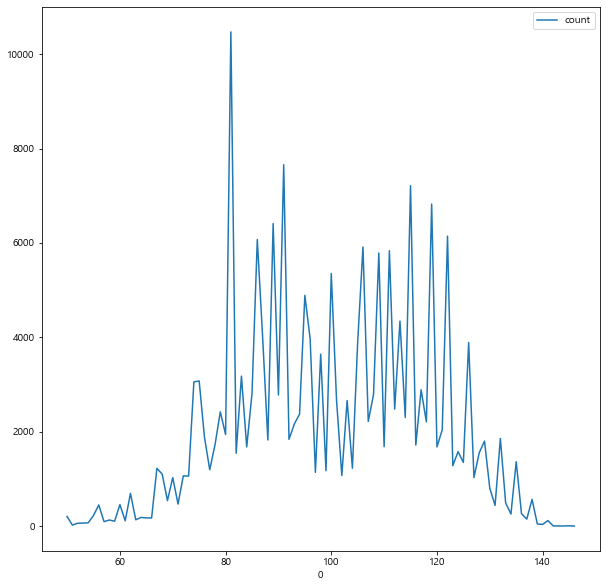

In [254]:
df_plot.plot()

# 시각화

In [255]:
# model.coef_

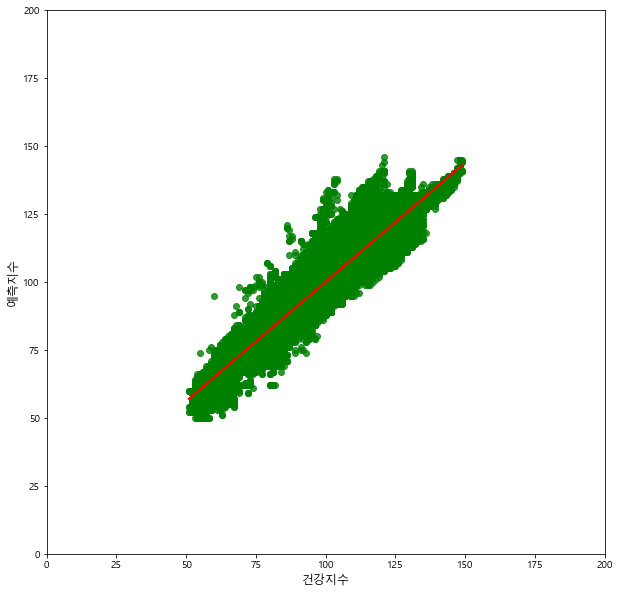

In [256]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.show()

# 남성 데이터 전체 계산

In [257]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
0,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0
1,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0
2,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0
3,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0
4,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0


In [258]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532766 entries, 0 to 532765
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   검진년도        532766 non-null  int64  
 1   UID         532766 non-null  int64  
 2   CU_REC_ID   532766 non-null  int64  
 3   SEX         532766 non-null  int64  
 4   검진당시나이      532766 non-null  int64  
 5   총빌리루빈       532766 non-null  float64
 6   직접빌리루빈      532766 non-null  float64
 7   간접빌리루빈      532766 non-null  float64
 8   총빌리루빈_kde   532766 non-null  float64
 9   직접빌리루빈_kde  532766 non-null  float64
 10  간접빌리루빈_kde  532766 non-null  float64
 11  kde_mean    532766 non-null  float64
 12  target      532766 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 52.8 MB


In [259]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
82817,2022,168996,2259500,1,35,0.9,0.3,0.6,125.28,73.63,157.46,118.79,110.0
82818,2023,168996,2259499,1,36,1.1,0.4,0.7,46.91,29.03,168.87,81.60,91.0


In [260]:
train_columns

['총빌리루빈', '직접빌리루빈', '간접빌리루빈']

In [261]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [262]:
len(df_pred)

532766

In [263]:
df_pred.reset_index(drop=True, inplace=True)

In [264]:
X_test

tensor([[0.8889, 0.6316, 0.9286],
        [0.6111, 0.3684, 0.6429],
        [0.3889, 0.9737, 0.4500],
        ...,
        [0.2833, 0.3684, 0.2143],
        [0.6667, 0.6316, 0.6429],
        [0.6500, 0.4737, 0.4500]])

In [265]:
df_pred.columns

Index(['총빌리루빈', '직접빌리루빈', '간접빌리루빈'], dtype='object')

In [266]:
df_pred[train_columns]

,총빌리루빈,직접빌리루빈,간접빌리루빈
0,0.611111,0.526316,0.450000
1,0.500000,0.368421,0.500000
2,0.500000,0.105263,0.571429
3,0.538889,0.368421,0.550000
4,0.516667,0.368421,0.521429
...,...,...,...
532761,0.388889,0.368421,0.357143
532762,0.277778,0.368421,0.214286
532763,0.555556,0.631579,0.500000
532764,0.500000,0.631579,0.428571


In [267]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [268]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [269]:
pred_data = pred_data.round(0)

In [270]:
pred_data

array([[ 98.],
       [111.],
       [116.],
       ...,
       [100.],
       [106.],
       [100.]], dtype=float32)

In [271]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [272]:
df_output

,총빌리루빈,직접빌리루빈,간접빌리루빈,예측지수
0,0.611111,0.526316,0.450000,98.0
1,0.500000,0.368421,0.500000,111.0
2,0.500000,0.105263,0.571429,116.0
3,0.538889,0.368421,0.550000,107.0
4,0.516667,0.368421,0.521429,110.0
...,...,...,...,...
532761,0.388889,0.368421,0.357143,119.0
532762,0.277778,0.368421,0.214286,126.0
532763,0.555556,0.631579,0.500000,100.0
532764,0.500000,0.631579,0.428571,106.0


In [273]:
if scaling_bool:
#     df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)
#     df_output = pd.concat([df_man, df_output], axis=1)
    df_output = pd.concat([df_man, df_output['예측지수']], axis=1)

In [274]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0,98.0
1,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0,111.0
2,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0,116.0
3,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0,107.0
4,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0,110.0
5,2021,62,699357,1,42,1.01,0.22,0.79,98.38,87.01,178.50,121.30,111.0,104.0
6,2022,62,1356310,1,43,0.86,0.26,0.60,124.39,46.80,157.46,109.55,105.0,109.0
7,2023,62,2170394,1,44,1.10,0.30,0.74,50.90,76.40,174.84,100.71,101.0,95.0
8,2019,67,410099,1,51,0.54,0.20,0.63,148.29,100.00,100.00,116.10,109.0,122.0
9,2020,67,481109,1,52,0.83,0.27,0.63,134.49,71.54,100.00,102.01,102.0,109.0


## 예측지수 성능평가

In [275]:
df_output.isnull().sum()

검진년도          0
UID           0
CU_REC_ID     0
SEX           0
검진당시나이        0
총빌리루빈         0
직접빌리루빈        0
간접빌리루빈        0
총빌리루빈_kde     0
직접빌리루빈_kde    0
간접빌리루빈_kde    0
kde_mean      0
target        0
예측지수          0
dtype: int64

In [276]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

5.409399248450539

# target으로 나이 계산

In [277]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [278]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0,98.0,24.4
1,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0,111.0,50.8
2,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0,116.0,51.8
3,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0,107.0,38.6
4,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0,110.0,39.0
5,2021,62,699357,1,42,1.01,0.22,0.79,98.38,87.01,178.50,121.30,111.0,104.0,41.2
6,2022,62,1356310,1,43,0.86,0.26,0.60,124.39,46.80,157.46,109.55,105.0,109.0,41.2
7,2023,62,2170394,1,44,1.10,0.30,0.74,50.90,76.40,174.84,100.71,101.0,95.0,45.0
8,2019,67,410099,1,51,0.54,0.20,0.63,148.29,100.00,100.00,116.10,109.0,122.0,46.6
9,2020,67,481109,1,52,0.83,0.27,0.63,134.49,71.54,100.00,102.01,102.0,109.0,50.2


## 예측나이 성능평가

In [279]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

2.95135012369408

# 최종 산출

In [280]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0,98.0,24.4
1,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0,111.0,50.8
2,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0,116.0,51.8
3,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0,107.0,38.6
4,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0,110.0,39.0


In [281]:
# df_output.to_csv('man.csv')

# 최종 UID별 확인

In [282]:
df_output

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,1.10,0.26,0.63,30.84,100.00,100.00,76.95,89.0,98.0,24.4
1,2019,50,356493,1,53,0.90,0.20,0.70,108.96,100.00,170.81,126.59,114.0,111.0,50.8
2,2021,50,642497,1,55,0.90,0.10,0.80,109.59,181.92,177.83,156.45,130.0,116.0,51.8
3,2019,62,421626,1,40,0.97,0.20,0.77,105.22,100.00,174.78,126.67,114.0,107.0,38.6
4,2020,62,565527,1,41,0.93,0.20,0.73,113.23,100.00,163.00,125.41,114.0,110.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532761,2024,1473524,2870174,1,36,0.70,0.20,0.50,146.78,100.00,162.04,136.27,119.0,119.0,32.2
532762,2024,1473528,2871080,1,65,0.50,0.20,0.30,148.07,100.92,168.33,139.11,121.0,126.0,59.8
532763,2024,1473554,2870504,1,29,1.00,0.30,0.70,100.00,87.58,166.28,117.95,110.0,100.0,29.0
532764,2024,1473599,2870970,1,26,0.90,0.30,0.60,148.79,75.23,163.78,129.27,116.0,106.0,24.8


In [283]:
# 성주용
df_output[df_output['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
446303,2023,897595,2328772,1,40,0.3,0.2,0.1,195.79,100.00,198.62,164.80,134.0,132.0,33.6
446304,2024,897595,2329051,1,41,0.8,0.3,0.5,120.41,87.32,152.02,119.92,111.0,109.0,39.2


In [284]:
# 최재..
df_output[df_output['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
342276,2022,492764,2783328,1,39,1.0,0.4,0.6,99.92,36.67,156.82,97.80,99.0,96.0,39.8
342277,2023,492764,2783327,1,40,0.9,0.4,0.5,138.81,33.16,166.26,112.74,107.0,101.0,39.8
342278,2024,492764,2783326,1,41,0.5,0.2,0.3,159.69,100.00,178.32,146.00,124.0,126.0,35.8


In [285]:
# 장경..
df_output[df_output['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
453298,2023,933936,1435266,1,40,1.0,0.3,0.7,100.00,81.80,170.64,117.48,110.0,100.0,40.0
453299,2024,933936,2242997,1,41,0.8,0.3,0.5,120.41,87.32,152.02,119.92,111.0,109.0,39.2


In [286]:
# 한...
df_output[df_output['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
446308,2022,897603,2555144,1,51,0.7,0.3,0.4,115.90,85.98,172.08,124.65,113.0,113.0,48.4
446309,2023,897603,2555143,1,52,0.6,0.2,0.4,151.89,100.00,180.24,144.04,123.0,122.0,47.6
446310,2024,897603,2555142,1,53,0.7,0.3,0.4,123.10,91.10,175.92,130.04,116.0,113.0,50.4


In [287]:
df_output[df_output['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
82817,2022,168996,2259500,1,35,0.9,0.3,0.6,125.28,73.63,157.46,118.79,110.0,106.0,33.8
82818,2023,168996,2259499,1,36,1.1,0.4,0.7,46.91,29.03,168.87,81.60,91.0,91.0,37.8


In [288]:
# df_output.to_excel('./output/소화기능나이_남자.xlsx')
# df_output.to_csv('./output/03_숙취나이_결측치제거_20대_남자.csv')

# 여성 모델

In [289]:
df_target['SEX'].value_counts()

1    690446
2    429723
Name: SEX, dtype: int64

In [290]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

429723

# 결측치 처리

## 결측치 삭제

In [291]:
# df_woman.dropna(inplace=True)

In [292]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
731637,2010,710490,213,2,28,0.7,0.2,NaN,146.59,100.00,100.0,115.53,108.0
693814,2010,315847,230,2,23,0.8,0.2,NaN,159.66,100.00,100.0,119.89,111.0
696125,2010,719072,231,2,24,0.5,0.1,NaN,158.56,35.06,100.0,97.87,99.0
952209,2010,552037,332,2,41,0.5,0.1,NaN,109.52,160.80,100.0,123.44,113.0
793943,2010,232950,983,2,32,1.2,0.2,NaN,10.26,100.00,100.0,70.09,85.0


## 결측치 평균으로 대체

In [293]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [294]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [295]:
target_cols

['총빌리루빈', '직접빌리루빈', '간접빌리루빈']

In [296]:
len(df_woman)

429723

In [297]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [298]:
len(df_woman)

366107

In [299]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
731637,2010,710490,213,2,28,0.7,0.2,NaN,146.59,100.00,100.0,115.53,108.0
693814,2010,315847,230,2,23,0.8,0.2,NaN,159.66,100.00,100.0,119.89,111.0
696125,2010,719072,231,2,24,0.5,0.1,NaN,158.56,35.06,100.0,97.87,99.0
952209,2010,552037,332,2,41,0.5,0.1,NaN,109.52,160.80,100.0,123.44,113.0
793943,2010,232950,983,2,32,1.2,0.2,NaN,10.26,100.00,100.0,70.09,85.0


In [300]:
len(df_woman)

366107

## fillna

In [301]:
df_woman.mean().round(2)

검진년도             2021.97
UID            489680.93
CU_REC_ID     1442394.12
SEX                 2.00
검진당시나이             38.87
총빌리루빈               0.72
직접빌리루빈              0.22
간접빌리루빈              0.51
총빌리루빈_kde         111.35
직접빌리루빈_kde         93.13
간접빌리루빈_kde        120.19
kde_mean          108.22
target            104.73
dtype: float64

In [302]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [303]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [304]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [305]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [306]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
731637,2010,710490,213,2,28,0.7,0.2,0.51,146.59,100.00,100.0,115.53,108.0
693814,2010,315847,230,2,23,0.8,0.2,0.51,159.66,100.00,100.0,119.89,111.0
696125,2010,719072,231,2,24,0.5,0.1,0.51,158.56,35.06,100.0,97.87,99.0
952209,2010,552037,332,2,41,0.5,0.1,0.51,109.52,160.80,100.0,123.44,113.0
793943,2010,232950,983,2,32,1.2,0.2,0.51,10.26,100.00,100.0,70.09,85.0


# 스크리닝

## 간접빌리루빈 스크리닝

In [307]:
screening = 0

In [308]:
df_woman[df_woman['간접빌리루빈'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target


In [309]:
len(df_woman[df_woman['간접빌리루빈'] < screening])

0

In [310]:
df_woman.loc[df_woman['간접빌리루빈'] < screening, '간접빌리루빈'] = screening

In [311]:
df_woman[df_woman['간접빌리루빈'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target


In [312]:
len(df_woman[df_woman['간접빌리루빈'] < screening])

0

# 중복 제거

In [313]:
len(df_woman)

366107

In [314]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [315]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
711246,2021,53,2632765,2,26,0.60,0.20,0.40,147.62,100.00,51.85,99.82,100.0
711245,2021,53,664316,2,26,0.60,0.20,0.40,147.62,100.00,51.85,99.82,100.0
759516,2024,53,2658222,2,29,0.50,0.20,0.30,136.50,100.00,56.70,97.73,99.0
763427,2020,54,497669,2,30,0.76,0.07,0.69,150.03,173.59,28.90,117.51,110.0
800655,2022,54,1319859,2,32,0.80,0.20,0.60,147.44,100.00,42.29,96.58,99.0
819837,2023,54,2039511,2,33,0.70,0.10,0.60,95.76,155.74,62.08,104.53,103.0
841837,2024,54,2750990,2,34,0.82,0.14,0.68,147.31,167.32,169.43,161.35,132.0
816838,2022,56,1351361,2,33,1.10,0.30,0.80,40.16,45.06,25.03,36.75,68.0
816837,2022,56,1019732,2,33,1.10,0.30,0.80,40.16,45.06,25.03,36.75,68.0
836840,2023,56,2032999,2,34,1.20,0.30,0.90,11.92,52.94,163.30,76.05,88.0


## first만 남겨두고 중복 제거

In [316]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [317]:
df_woman.reset_index(drop=True, inplace=True)

In [318]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
0,2021,53,2632765,2,26,0.60,0.20,0.40,147.62,100.00,51.85,99.82,100.0
1,2024,53,2658222,2,29,0.50,0.20,0.30,136.50,100.00,56.70,97.73,99.0
2,2020,54,497669,2,30,0.76,0.07,0.69,150.03,173.59,28.90,117.51,110.0
3,2022,54,1319859,2,32,0.80,0.20,0.60,147.44,100.00,42.29,96.58,99.0
4,2023,54,2039511,2,33,0.70,0.10,0.60,95.76,155.74,62.08,104.53,103.0
5,2024,54,2750990,2,34,0.82,0.14,0.68,147.31,167.32,169.43,161.35,132.0
6,2022,56,1351361,2,33,1.10,0.30,0.80,40.16,45.06,25.03,36.75,68.0
7,2023,56,2032999,2,34,1.20,0.30,0.90,11.92,52.94,163.30,76.05,88.0
8,2021,59,701026,2,29,0.90,0.20,0.70,142.92,100.00,34.77,92.56,97.0
9,2022,59,1376992,2,30,0.90,0.30,0.60,147.50,54.71,41.61,81.27,91.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

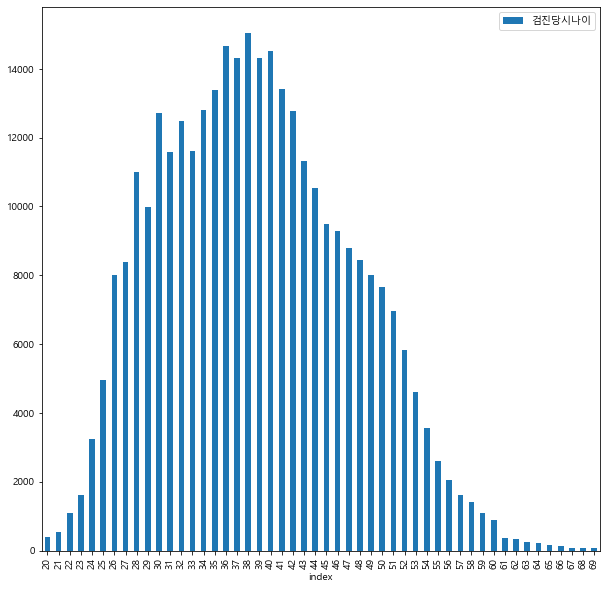

In [319]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [320]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,394
39,21,552
37,22,1087
33,23,1625
30,24,3248
27,25,4961
23,26,8013
21,27,8387
14,28,10988
16,29,9973


# 검진항목 시각화

In [321]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
count,328729.000000,3.287290e+05,3.287290e+05,328729.0,328729.000000,328729.000000,328729.000000,328729.000000,328729.000000,328729.000000,328729.000000,328729.000000,328729.000000
mean,2021.886131,4.824163e+05,1.407657e+06,2.0,38.778000,0.729721,0.217321,0.511728,110.731862,94.006568,120.213760,108.317483,104.780117
std,1.578736,3.582901e+05,8.166235e+05,0.0,8.438737,0.268530,0.080628,0.195867,44.413786,45.030320,49.036754,31.106748,16.040848
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,0.000000,0.060000,0.000000,0.040000,3.420000,0.060000,2.040000,50.000000
25%,2021.000000,2.144110e+05,6.025400e+05,2.0,32.000000,0.520000,0.180000,0.400000,89.460000,52.940000,100.000000,90.820000,96.000000
50%,2022.000000,3.642420e+05,1.317834e+06,2.0,38.000000,0.700000,0.200000,0.510000,121.520000,100.000000,138.040000,111.280000,106.000000
75%,2023.000000,8.011730e+05,2.122887e+06,2.0,45.000000,0.900000,0.300000,0.600000,142.000000,120.500000,160.590000,129.950000,116.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,1.800000,0.440000,1.400000,199.990000,192.280000,199.740000,195.130000,150.000000


<AxesSubplot:xlabel='검진당시나이'>

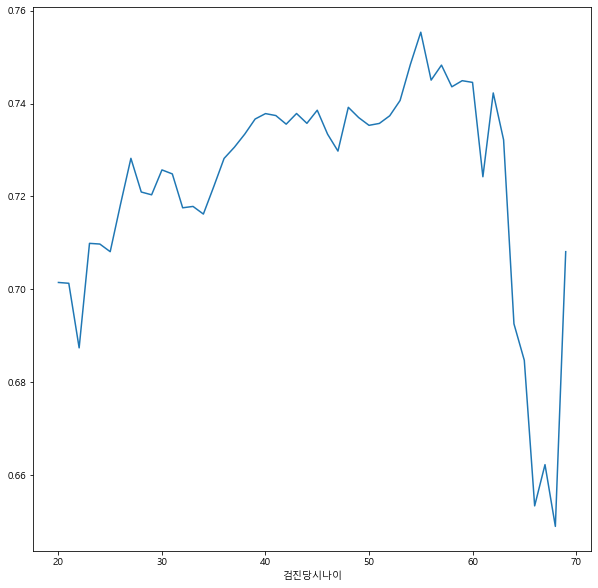

In [322]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

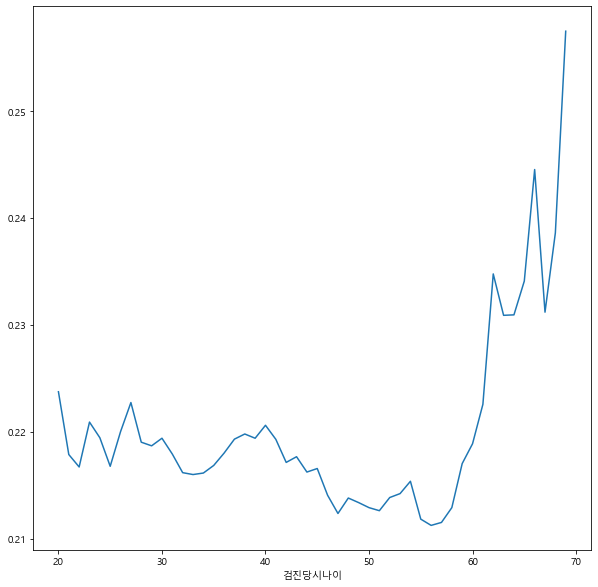

In [323]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

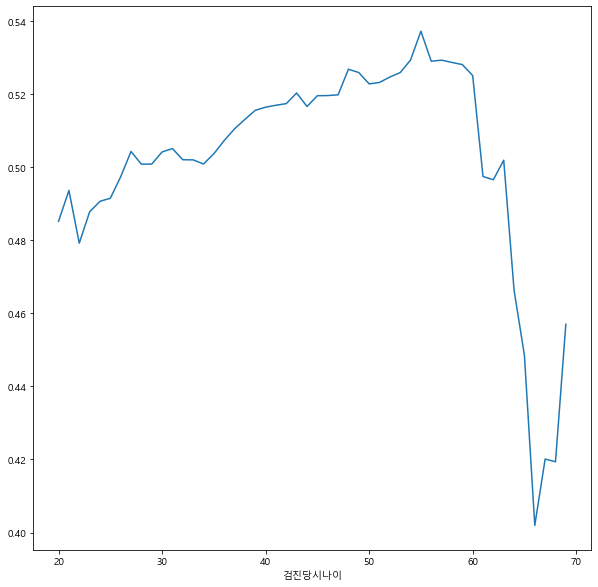

In [324]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

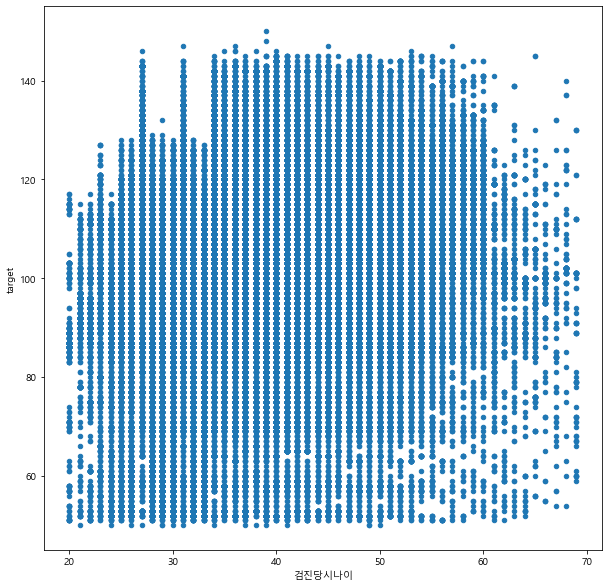

In [325]:
df_woman.plot.scatter(x='검진당시나이', y='target')

<AxesSubplot:xlabel='index'>

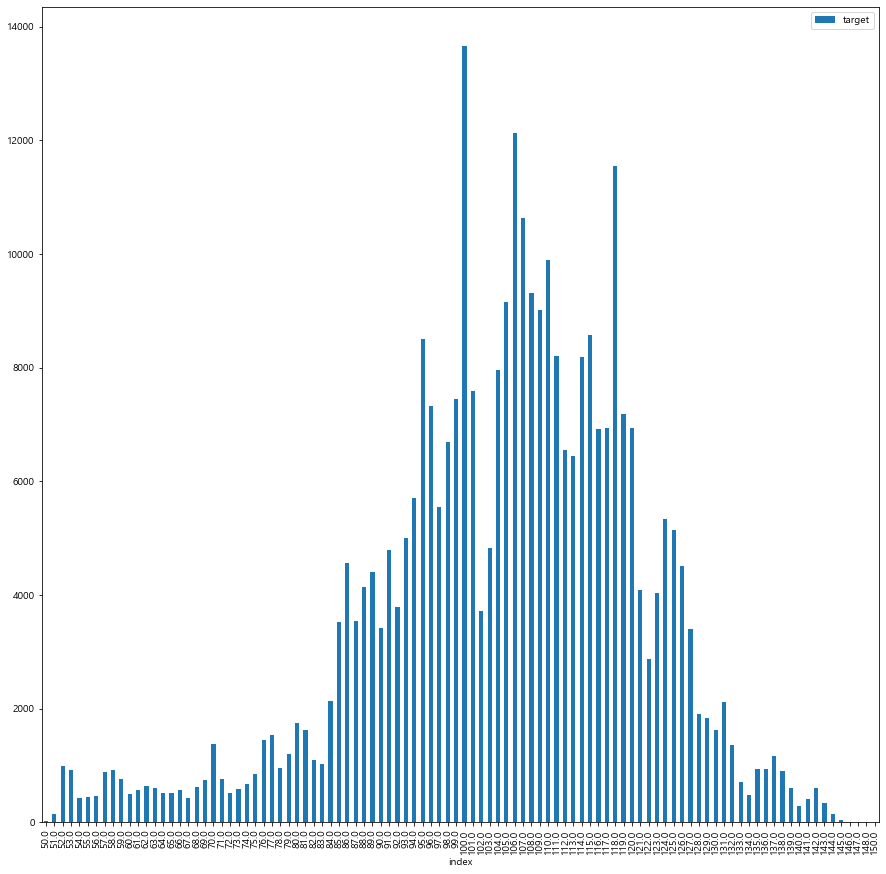

In [326]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

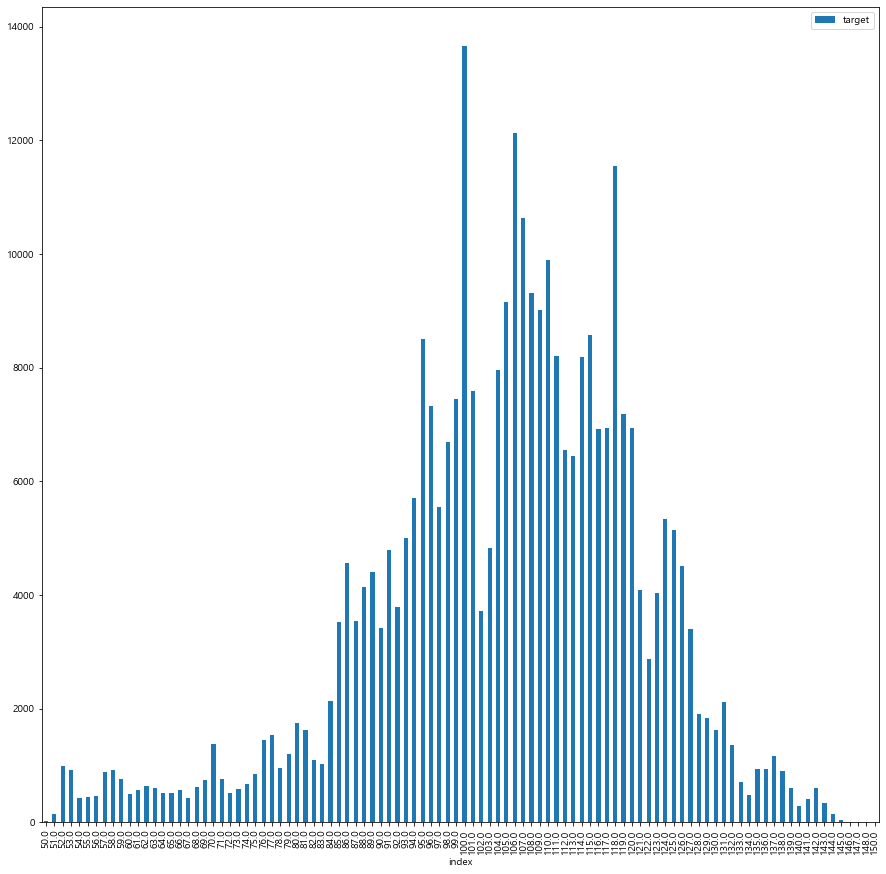

In [327]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [328]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
95,50.0,16
92,51.0,144
58,52.0,984
63,53.0,918
88,54.0,426
86,55.0,441
85,56.0,463
65,57.0,889
62,58.0,927
68,59.0,757


In [329]:
df_woman_sampling = pd.DataFrame()

for target in range(int(df_woman['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [330]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

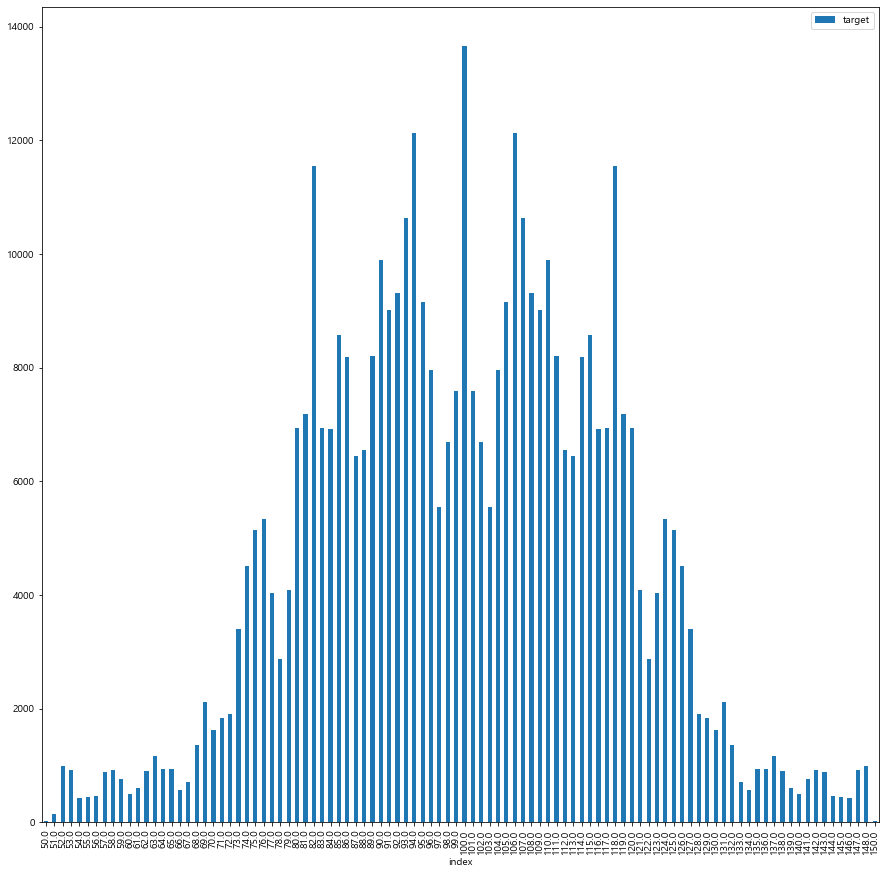

In [331]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [332]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
99,50.0,16
97,51.0,144
67,52.0,984
75,53.0,918
96,54.0,426
94,55.0,441
92,56.0,463
79,57.0,889
74,58.0,927
82,59.0,757


# 나이별 확인하기

In [333]:
# df_woman['검진당시나이'].value_counts()

In [334]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [335]:
# df_woman['검진당시나이'].min()

In [336]:
# df_woman['검진당시나이'].max()

In [337]:
# df_woman.columns

In [338]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [339]:
# df_temp.info()

In [340]:
# df_temp.reset_index(drop=True, inplace=True)

In [341]:
# df_woman = df_temp.copy()

In [342]:
# df_woman['검진당시나이'].value_counts()

In [343]:
# df_woman[df_woman['검진당시나이']==20]

In [344]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [345]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [346]:
train_columns

['총빌리루빈', '직접빌리루빈', '간접빌리루빈']

In [347]:
# target_col = '검진당시나이'

In [348]:
target_col

'target'

## Min Max Scaling

In [349]:
from sklearn.preprocessing import MinMaxScaler

In [350]:
scaling_bool

True

In [351]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_sampling_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)
    
    data_scaler2 = scaler.fit_transform(df_woman[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler2, columns=train_columns)

## train_test_split

In [352]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [353]:
# model2 = LinearRegression()

In [354]:
# model2.fit(X_train2, y_train2)

In [355]:
# model2.intercept_

In [356]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [357]:
# model2 = XGBRegressor()

In [358]:
# # A parameter grid for XGBoost
# params = {
#     'n_estimators':[500],
# #     'min_child_weight':[4,5], 
# #     'gamma':[i/10.0 for i in range(3,6)],  
# #     'subsample':[i/10.0 for i in range(6,11)],
# #     'colsample_bytree':[i/10.0 for i in range(6,11)], 
# #     'max_depth': [2,3,4,6,7],
#     'objective': ['reg:squarederror', 'reg:tweedie'],
#     'booster': ['gbtree', 'gblinear'],
#     'eval_metric': ['rmse'],
#     'eta': [i/10.0 for i in range(3,6)],
# }

In [359]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model2, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [360]:
# import time
# start = time.time()
# random_search.fit(X_train2, y_train2)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

In [361]:
# # best parameter
# random_search.best_params_

In [362]:
# # best score
# random_search.best_score_

In [363]:
# model2 = random_search.best_estimator_
# model2

## Keras

In [364]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [365]:
# model = build_model()

In [366]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [367]:
# model.summary()

In [368]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [369]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [370]:
# plot_history(history)

## pyTorch 신경망

In [371]:
np.shape(X_train)[1]

3

In [372]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [373]:
model2 = Regressor()
reg_loss2 = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
optimizer2 = optim.Adam(model2.parameters())

In [374]:
# epochs = 1000

In [375]:
X_train2  = torch.Tensor(X_train2.to_numpy())
X_test2  = torch.Tensor(X_test2.to_numpy())
y_train2  = torch.Tensor(y_train2.to_numpy().reshape(-1, 1))
y_test2  = torch.Tensor(y_test2.to_numpy().reshape(-1, 1))

In [379]:
import time
start = time.time()

losses2 = []

# 총 100번의 에포크 동안 모델 학습
for epoch in range(epochs):
    optimizer2.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred2 = model2(X_train2)          # 순전파 연산으로 예측값 계산
    loss = reg_loss2(y_pred2, y_train2)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer2.step()           # 옵티마이저를 통해 파라미터 업데이트

    # 10번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

    # 손실 값을 리스트에 추가하여 추적
    losses2.append(loss.item())
    
end = time.time()
print(f"{end - start:.5f} sec")

Epoch    0/400 Cost: 10181.820312
Epoch   10/400 Cost: 9813.114258
Epoch   20/400 Cost: 9076.100586
Epoch   30/400 Cost: 7769.666504
Epoch   40/400 Cost: 5747.499512
Epoch   50/400 Cost: 3212.744629
Epoch   60/400 Cost: 1270.953369
Epoch   70/400 Cost: 1034.879150
Epoch   80/400 Cost: 939.447632
Epoch   90/400 Cost: 783.151917
Epoch  100/400 Cost: 711.420288
Epoch  110/400 Cost: 629.982300
Epoch  120/400 Cost: 561.011536
Epoch  130/400 Cost: 494.698303
Epoch  140/400 Cost: 433.847290
Epoch  150/400 Cost: 377.879761
Epoch  160/400 Cost: 326.649017
Epoch  170/400 Cost: 280.586395
Epoch  180/400 Cost: 240.071701
Epoch  190/400 Cost: 205.388245
Epoch  200/400 Cost: 176.558304
Epoch  210/400 Cost: 153.318573
Epoch  220/400 Cost: 135.224274
Epoch  230/400 Cost: 121.657463
Epoch  240/400 Cost: 111.820427
Epoch  250/400 Cost: 104.870102
Epoch  260/400 Cost: 100.050522
Epoch  270/400 Cost: 96.763748
Epoch  280/400 Cost: 94.535011
Epoch  290/400 Cost: 93.013557
Epoch  300/400 Cost: 91.954102
Epo

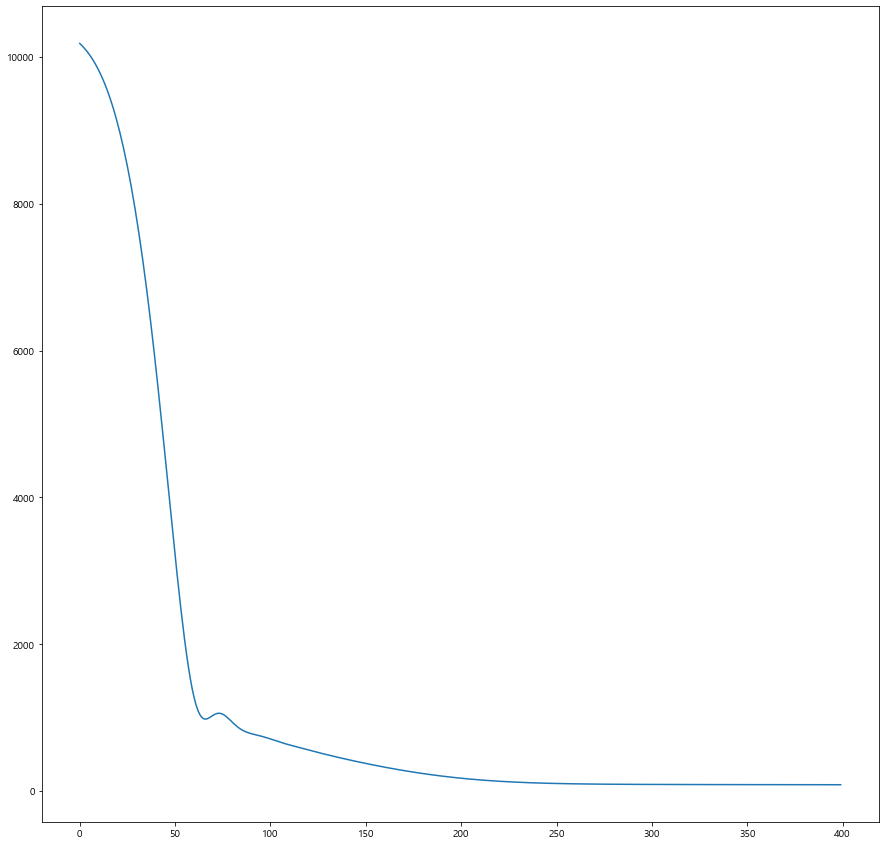

In [380]:
plt.plot(losses2)

## coef 계산

In [381]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [382]:
# df_coef2.columns = ['검사항목', 'coef']

In [383]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [384]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [385]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [386]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [387]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [388]:
# slr2 = LinearRegression()

In [389]:
# slr2.fit(X_train2_poly, y_train2)

In [390]:
# np.shape(X_train2)

In [391]:
# np.shape(X_train2_poly)

In [392]:
# np.shape(X_test2)

In [393]:
# np.shape(X_test2_poly)

In [394]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [395]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [396]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [397]:
# model_path2 = './model/03/11/20/best_estimator2.pkl'

In [398]:
# import pickle
# with open(model_path2,'wb') as f:
#     pickle.dump(model2, f)

In [399]:
# with open(model_path2, 'rb') as f:
#     model2 = pickle.load(f)

In [400]:
# Get predictions
# y_pred2 = model2.predict(X_test2)

# 성능 평가

## pyTorch 예측

In [401]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [402]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [403]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 7.563204
MSE : 87.671265
RMSE : 9.363294


In [404]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.7147815656681584

In [405]:
if XGB_bool:
    model2.score(X_test2, y_test2)

## feature importance

In [406]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2)

# 실제나이 - 예측나이 결과

In [407]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [408]:
df_test2.head()

,0,0
0,102.0,85.284767
1,90.0,93.451385
2,90.0,96.524452
3,119.0,118.834511
4,108.0,109.084717


In [409]:
df_test2.columns

Int64Index([0, 0], dtype='int64')

In [410]:
df_test2.columns = ['실제지수', '예측지수']

In [411]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [412]:
df_test2.head()

,실제지수,예측지수,diff
0,102.0,85.284767,-16.715233
1,90.0,93.451385,3.451385
2,90.0,96.524452,6.524452
3,119.0,118.834511,-0.165489
4,108.0,109.084717,1.084717


In [413]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [414]:
len(df_test2)

111347

In [415]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,102.0,85.284767,-16.715233,-17.0
1,90.0,93.451385,3.451385,3.0
2,90.0,96.524452,6.524452,7.0
3,119.0,118.834511,-0.165489,-0.0
4,108.0,109.084717,1.084717,1.0


<AxesSubplot:>

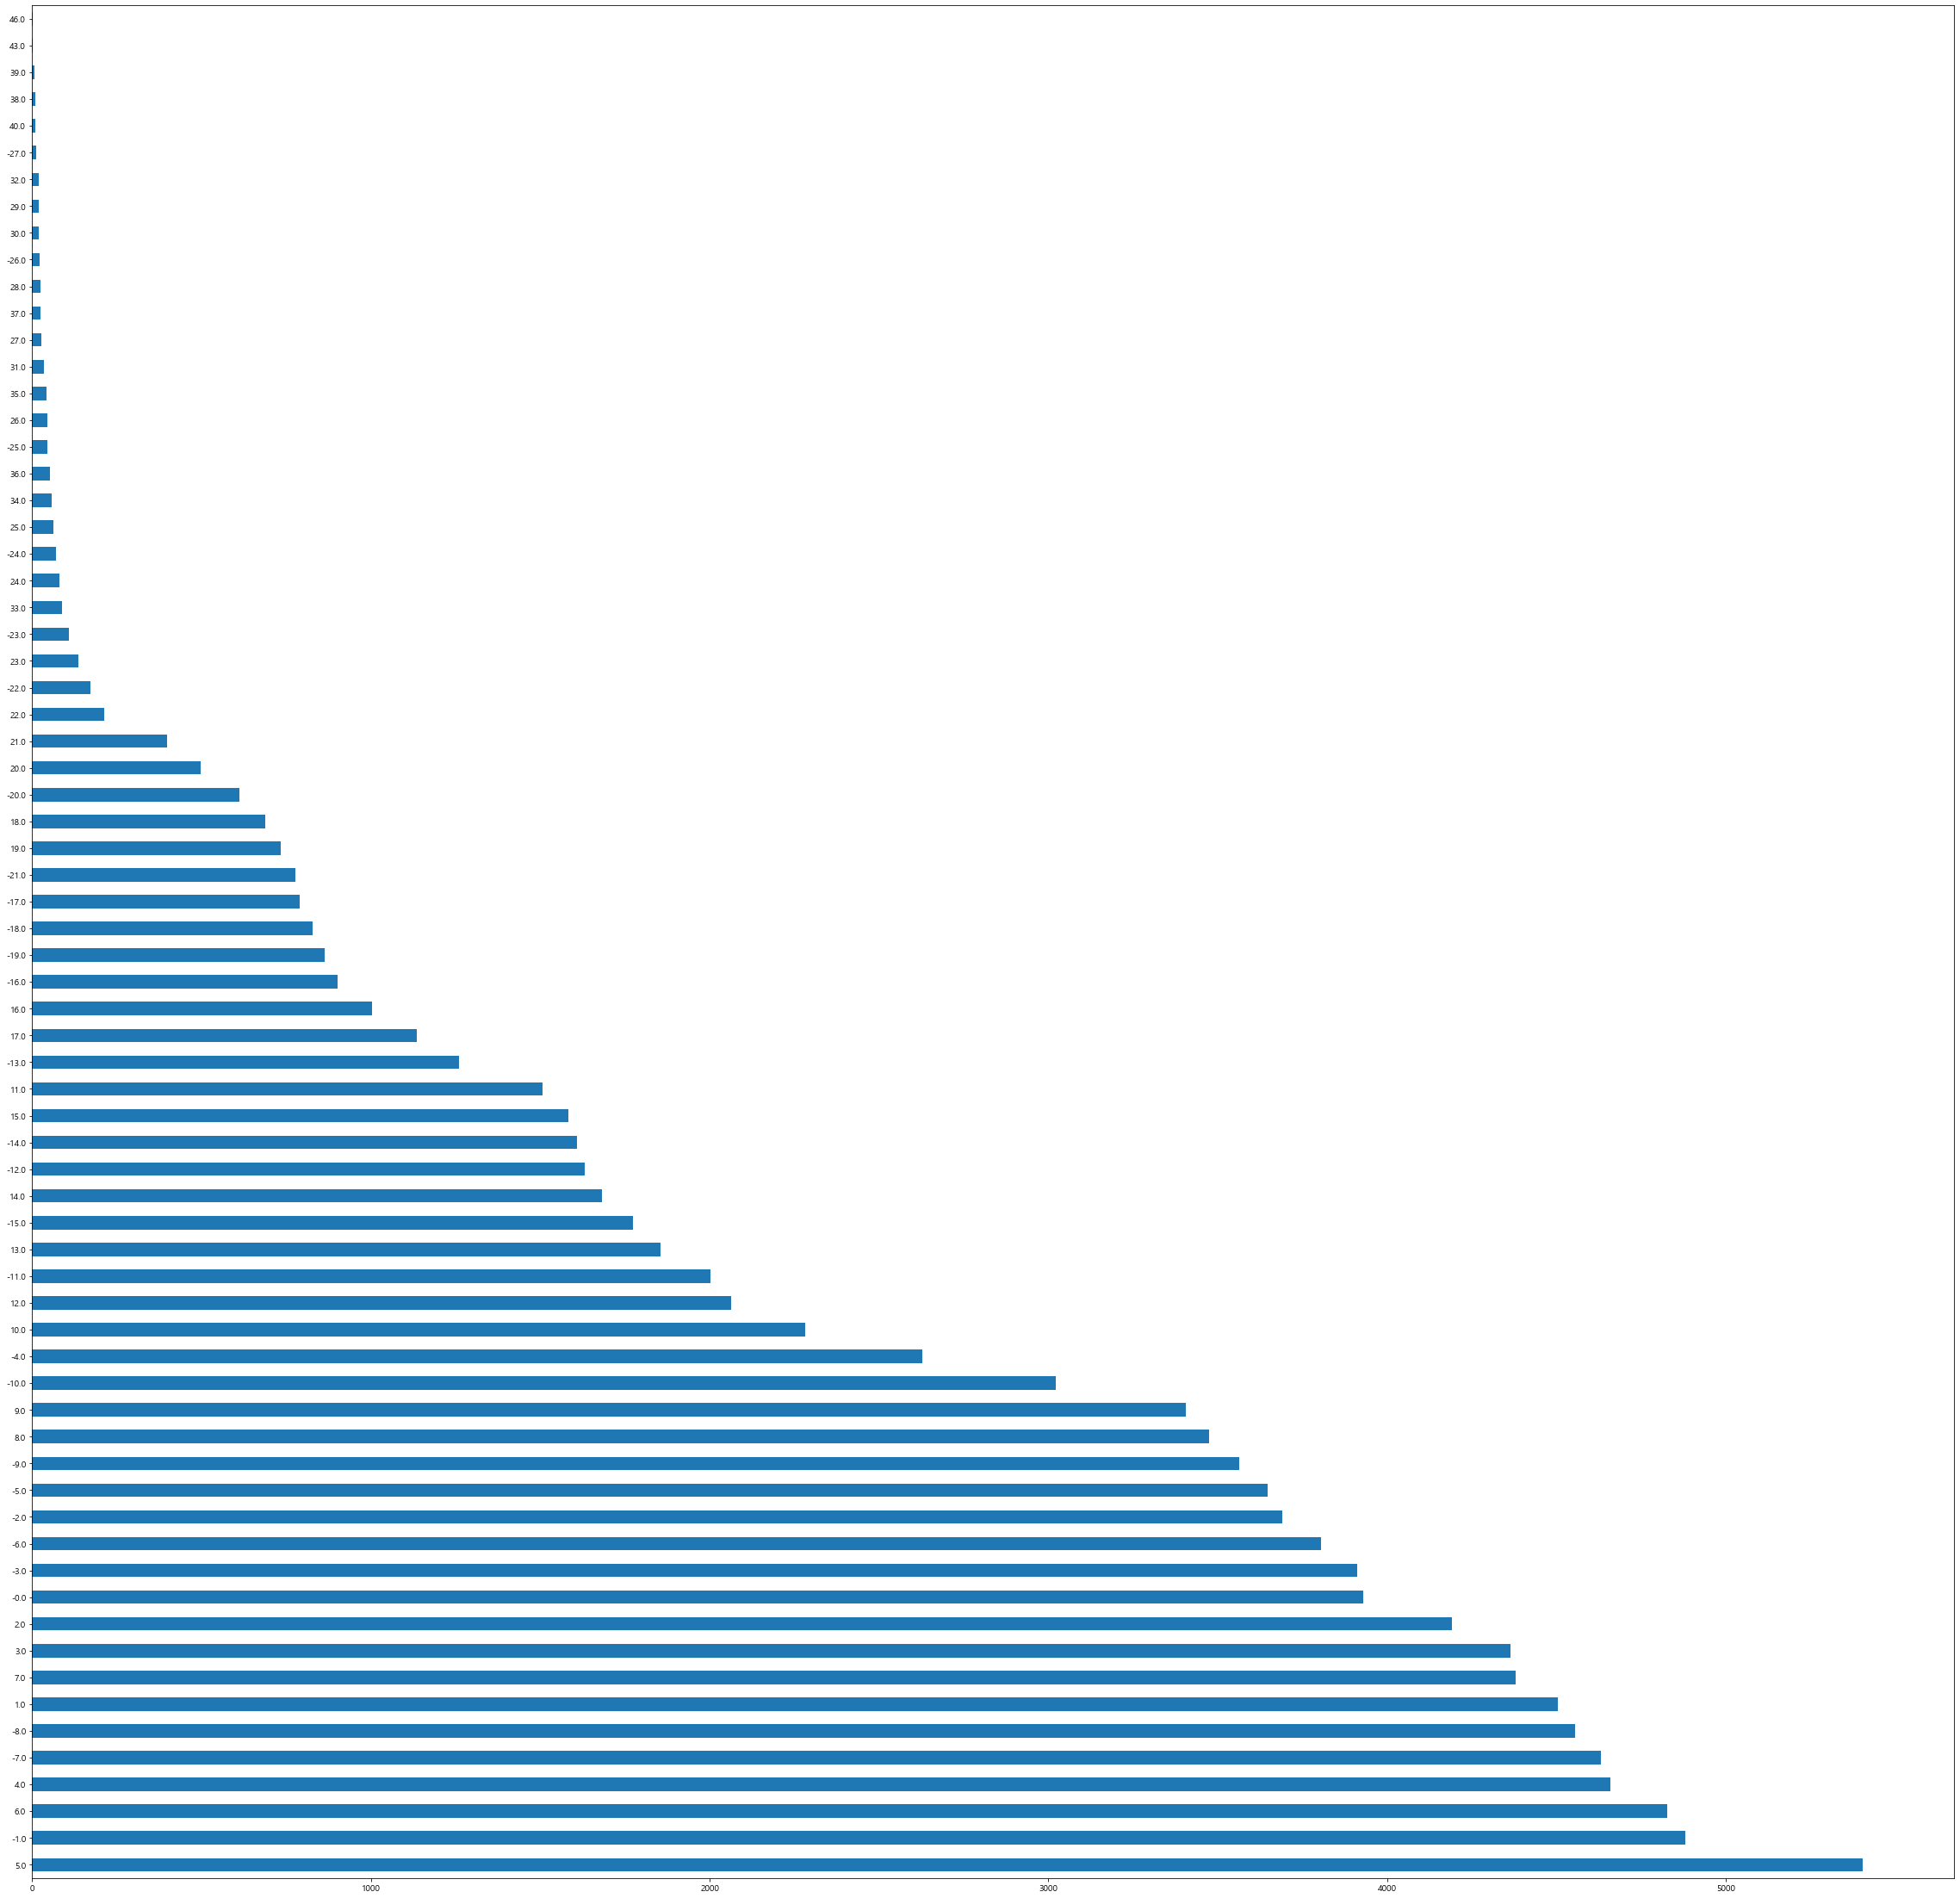

In [416]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [417]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2)

In [418]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [419]:
df_train2.round(0).value_counts()

106.0    17236
109.0    15814
112.0    14453
93.0     13448
97.0     12978
103.0    12649
90.0     11423
87.0     11284
99.0     10439
115.0     9620
100.0     7568
123.0     7426
120.0     7351
83.0      7241
74.0      7095
82.0      6926
96.0      6707
86.0      6336
104.0     6297
125.0     6190
108.0     5702
88.0      5699
101.0     5598
80.0      5545
92.0      5383
79.0      5278
110.0     5016
85.0      4826
76.0      4626
94.0      4536
127.0     4479
118.0     4405
117.0     4089
77.0      3943
91.0      3864
89.0      3682
84.0      3647
113.0     3627
98.0      3614
107.0     3463
73.0      3413
105.0     3309
95.0      3238
122.0     3160
102.0     3136
81.0      3006
111.0     2722
75.0      2657
114.0     2578
116.0     2575
124.0     2159
130.0     2041
119.0     2031
121.0     1842
78.0      1659
134.0     1123
126.0      893
72.0       845
133.0      636
128.0      614
129.0      336
132.0      308
131.0      242
136.0       14
dtype: int64

In [420]:
y_test2.value_counts()

100.0    3474
94.0     3114
106.0    3010
118.0    2906
82.0     2887
107.0    2648
93.0     2570
110.0    2413
90.0     2407
108.0    2328
105.0    2305
95.0     2299
92.0     2287
91.0     2224
109.0    2148
85.0     2146
115.0    2133
111.0    2111
86.0     2108
96.0     2089
89.0     2054
114.0    2025
104.0    1976
99.0     1919
101.0    1906
81.0     1840
80.0     1749
120.0    1745
117.0    1728
119.0    1728
84.0     1728
116.0    1723
83.0     1715
102.0    1668
88.0     1667
87.0     1660
112.0    1657
98.0     1647
113.0    1587
103.0    1424
124.0    1365
97.0     1352
76.0     1312
75.0     1309
125.0    1308
74.0     1152
126.0    1108
79.0     1033
77.0     1014
121.0    1013
123.0     990
73.0      888
127.0     810
78.0      704
122.0     697
69.0      525
131.0     520
128.0     489
71.0      483
72.0      465
129.0     448
70.0      415
130.0     362
68.0      356
132.0     345
137.0     312
63.0      283
148.0     261
142.0     259
65.0      256
58.0      246
52.0  

In [421]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [422]:
df_plot.columns = ['count']

In [423]:
df_plot.reset_index(inplace=True)

In [424]:
df_plot = df_plot.sort_values(0, ascending=True)

In [425]:
df_plot.set_index(0, inplace=True)

<AxesSubplot:xlabel='0'>

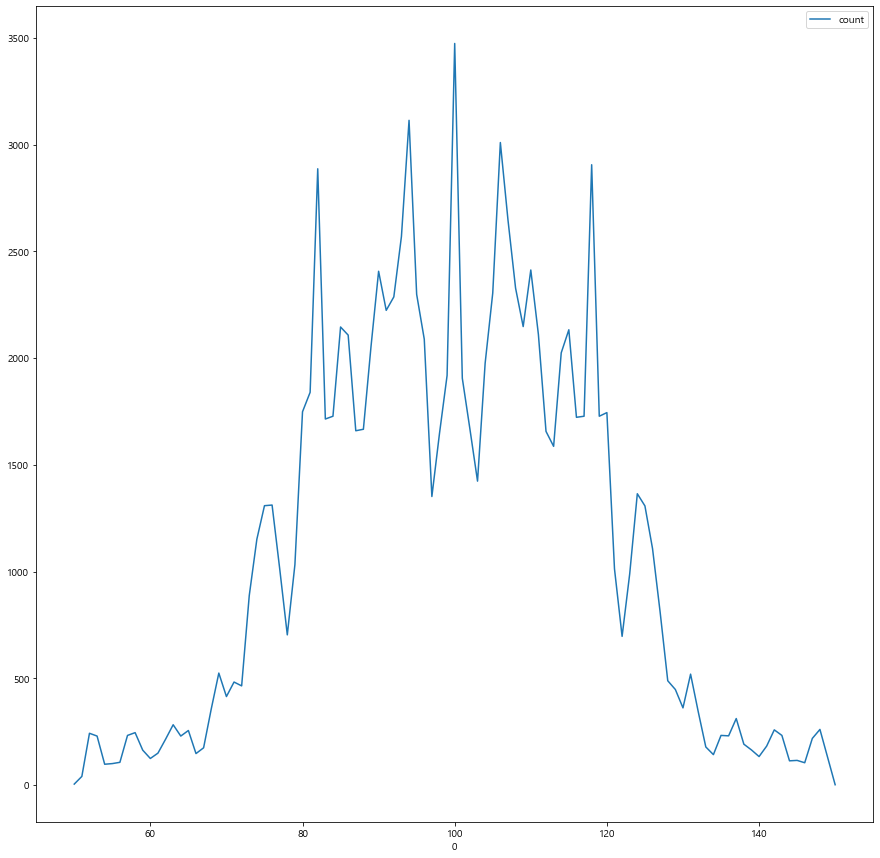

In [426]:
df_plot.plot()

In [427]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [428]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [429]:
df_test2.round(0).value_counts()

106.0    5973
109.0    5182
112.0    4960
93.0     4507
97.0     4288
103.0    4161
90.0     3812
87.0     3636
99.0     3443
115.0    3208
100.0    2494
123.0    2472
120.0    2469
74.0     2428
83.0     2368
82.0     2296
96.0     2228
86.0     2165
104.0    2056
125.0    2021
108.0    1891
101.0    1866
92.0     1834
80.0     1819
88.0     1778
79.0     1764
110.0    1692
76.0     1616
94.0     1574
85.0     1560
127.0    1524
118.0    1424
117.0    1347
91.0     1333
84.0     1267
77.0     1267
89.0     1226
98.0     1220
113.0    1199
73.0     1187
107.0    1114
105.0    1103
122.0    1083
102.0    1044
95.0     1031
81.0     1028
111.0     939
75.0      856
116.0     831
114.0     826
130.0     724
124.0     710
119.0     641
121.0     601
78.0      596
134.0     373
72.0      280
126.0     270
133.0     218
128.0     202
129.0     116
132.0     116
131.0      88
136.0       2
dtype: int64

In [430]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [431]:
df_plot2.columns = ['count']

In [432]:
df_plot2.reset_index(inplace=True)

In [433]:
df_plot2

,0,count
0,106.0,5973
1,109.0,5182
2,112.0,4960
3,93.0,4507
4,97.0,4288
5,103.0,4161
6,90.0,3812
7,87.0,3636
8,99.0,3443
9,115.0,3208


In [434]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [435]:
df_plot2.set_index(0, inplace=True)

In [436]:
df_plot2

,count
0,
72.0,280
73.0,1187
74.0,2428
75.0,856
76.0,1616
77.0,1267
78.0,596
79.0,1764
80.0,1819


<AxesSubplot:xlabel='0'>

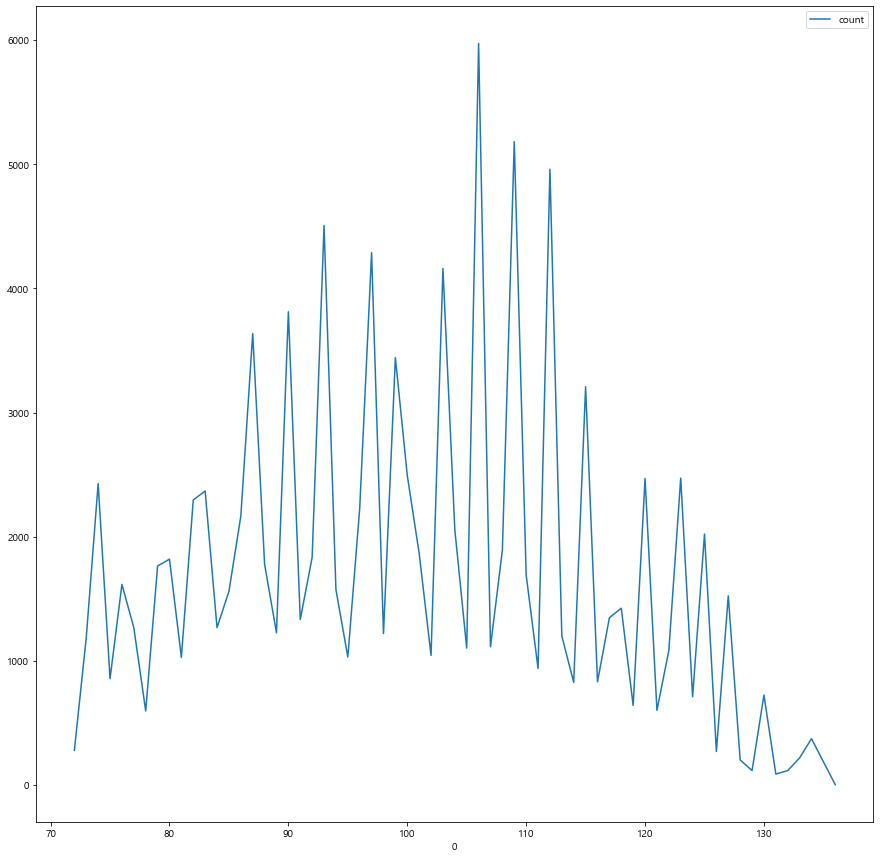

In [437]:
df_plot2.plot()

# 시각화

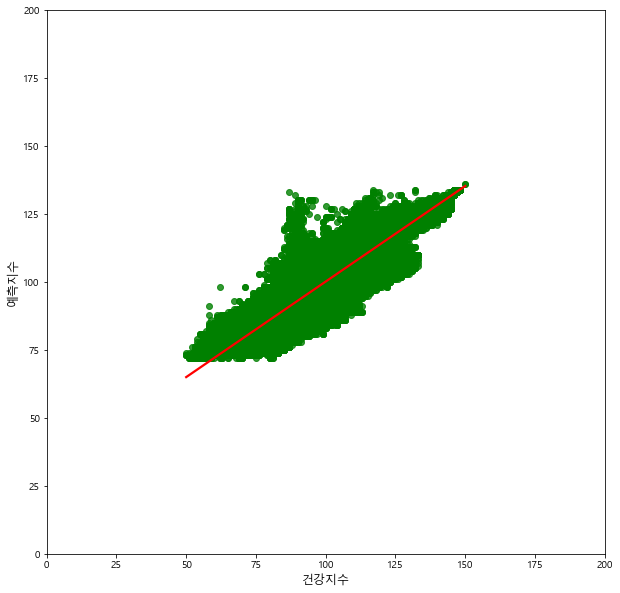

In [438]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.show()

# 여성 데이터 전체 계산

In [439]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
0,2021,53,2632765,2,26,0.60,0.20,0.40,147.62,100.00,51.85,99.82,100.0
1,2024,53,2658222,2,29,0.50,0.20,0.30,136.50,100.00,56.70,97.73,99.0
2,2020,54,497669,2,30,0.76,0.07,0.69,150.03,173.59,28.90,117.51,110.0
3,2022,54,1319859,2,32,0.80,0.20,0.60,147.44,100.00,42.29,96.58,99.0
4,2023,54,2039511,2,33,0.70,0.10,0.60,95.76,155.74,62.08,104.53,103.0


In [440]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328729 entries, 0 to 328728
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   검진년도        328729 non-null  int64  
 1   UID         328729 non-null  int64  
 2   CU_REC_ID   328729 non-null  int64  
 3   SEX         328729 non-null  int64  
 4   검진당시나이      328729 non-null  int64  
 5   총빌리루빈       328729 non-null  float64
 6   직접빌리루빈      328729 non-null  float64
 7   간접빌리루빈      328729 non-null  float64
 8   총빌리루빈_kde   328729 non-null  float64
 9   직접빌리루빈_kde  328729 non-null  float64
 10  간접빌리루빈_kde  328729 non-null  float64
 11  kde_mean    328729 non-null  float64
 12  target      328729 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 32.6 MB


In [441]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
72006,2021,196909,2495703,2,28,0.8,0.3,0.51,155.53,57.38,100.00,104.30,103.0
72007,2023,196909,2495700,2,30,0.6,0.3,0.30,141.61,54.71,46.46,80.93,91.0
72008,2024,196909,2495697,2,31,1.0,0.4,0.60,93.10,16.33,142.42,83.95,92.0


In [442]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [443]:
len(df_pred2)

328729

In [444]:
df_pred2.reset_index(drop=True, inplace=True)

In [445]:
X_test2

tensor([[0.5889, 0.6053, 0.5500],
        [0.5556, 0.5000, 0.3643],
        [0.3889, 0.6316, 0.2857],
        ...,
        [0.2000, 0.2632, 0.3643],
        [0.6333, 0.3421, 0.6786],
        [0.3889, 0.3684, 0.3571]])

In [446]:
df_pred2.columns

Index(['총빌리루빈', '직접빌리루빈', '간접빌리루빈'], dtype='object')

In [447]:
df_pred2[train_columns]

,총빌리루빈,직접빌리루빈,간접빌리루빈
0,0.333333,0.368421,0.285714
1,0.277778,0.368421,0.214286
2,0.422222,0.026316,0.492857
3,0.444444,0.368421,0.428571
4,0.388889,0.105263,0.428571
...,...,...,...
328724,0.444444,0.631579,0.357143
328725,0.222222,0.368421,0.142857
328726,0.277778,0.368421,0.214286
328727,0.222222,0.368421,0.142857


In [448]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [449]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [450]:
pred_data2

array([[109.08472],
       [112.01325],
       [117.94054],
       ...,
       [112.01325],
       [114.88782],
       [125.09   ]], dtype=float32)

In [451]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [452]:
if scaling_bool:
#     df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)
    df_output2 = pd.concat([df_woman, df_output2['예측지수']], axis=1)

In [453]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,0.60,0.20,0.40,147.62,100.00,51.85,99.82,100.0,109.084717
1,2024,53,2658222,2,29,0.50,0.20,0.30,136.50,100.00,56.70,97.73,99.0,112.013252
2,2020,54,497669,2,30,0.76,0.07,0.69,150.03,173.59,28.90,117.51,110.0,117.940536
3,2022,54,1319859,2,32,0.80,0.20,0.60,147.44,100.00,42.29,96.58,99.0,102.784386
4,2023,54,2039511,2,33,0.70,0.10,0.60,95.76,155.74,62.08,104.53,103.0,116.724846
5,2024,54,2750990,2,34,0.82,0.14,0.68,147.31,167.32,169.43,161.35,132.0,108.508385
6,2022,56,1351361,2,33,1.10,0.30,0.80,40.16,45.06,25.03,36.75,68.0,83.115273
7,2023,56,2032999,2,34,1.20,0.30,0.90,11.92,52.94,163.30,76.05,88.0,79.693367
8,2021,59,701026,2,29,0.90,0.20,0.70,142.92,100.00,34.77,92.56,97.0,99.313713
9,2022,59,1376992,2,30,0.90,0.30,0.60,147.50,54.71,41.61,81.27,91.0,89.997925


## 예측지수 성능평가

In [454]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

7.576043378365786

# target으로 나이 계산

In [455]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [456]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,0.60,0.20,0.40,147.62,100.00,51.85,99.82,100.0,109.084717,24.18
1,2024,53,2658222,2,29,0.50,0.20,0.30,136.50,100.00,56.70,97.73,99.0,112.013252,26.60
2,2020,54,497669,2,30,0.76,0.07,0.69,150.03,173.59,28.90,117.51,110.0,117.940536,26.41
3,2022,54,1319859,2,32,0.80,0.20,0.60,147.44,100.00,42.29,96.58,99.0,102.784386,31.44
4,2023,54,2039511,2,33,0.70,0.10,0.60,95.76,155.74,62.08,104.53,103.0,116.724846,29.66
5,2024,54,2750990,2,34,0.82,0.14,0.68,147.31,167.32,169.43,161.35,132.0,108.508385,32.30
6,2022,56,1351361,2,33,1.10,0.30,0.80,40.16,45.06,25.03,36.75,68.0,83.115273,36.38
7,2023,56,2032999,2,34,1.20,0.30,0.90,11.92,52.94,163.30,76.05,88.0,79.693367,38.06
8,2021,59,701026,2,29,0.90,0.20,0.70,142.92,100.00,34.77,92.56,97.0,99.313713,29.14
9,2022,59,1376992,2,30,0.90,0.30,0.60,147.50,54.71,41.61,81.27,91.0,89.997925,32.00


## 예측나이 성능평가

In [457]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.327708629296472

# 최종 산출

In [458]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,0.60,0.20,0.40,147.62,100.00,51.85,99.82,100.0,109.084717,24.18
1,2024,53,2658222,2,29,0.50,0.20,0.30,136.50,100.00,56.70,97.73,99.0,112.013252,26.60
2,2020,54,497669,2,30,0.76,0.07,0.69,150.03,173.59,28.90,117.51,110.0,117.940536,26.41
3,2022,54,1319859,2,32,0.80,0.20,0.60,147.44,100.00,42.29,96.58,99.0,102.784386,31.44
4,2023,54,2039511,2,33,0.70,0.10,0.60,95.76,155.74,62.08,104.53,103.0,116.724846,29.66


In [459]:
# df_output2.to_csv('woman.csv')

# 최종 UID별 확인

In [460]:
# 성..
df_output2[df_output2['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
106170,2021,261581,2418910,2,50,0.7,0.2,0.5,121.45,100.00,164.34,128.60,115.0,106.018051,48.80
106171,2022,261581,2243878,2,51,0.6,0.2,0.4,101.78,100.00,148.67,116.82,109.0,109.084717,49.18
106172,2023,261581,2243877,2,52,0.9,0.3,0.6,142.86,46.81,167.17,118.95,110.0,89.997925,54.00
106173,2024,261581,2418911,2,53,0.8,0.3,0.5,72.75,45.83,147.24,88.61,95.0,93.313545,54.34


In [461]:
# 차..
df_output2[df_output2['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target,예측지수,예측나이
216007,2022,477944,2212776,2,31,0.7,0.3,0.4,93.03,56.05,121.36,90.15,95.0,96.524452,31.70
216008,2023,477944,2212775,2,32,1.0,0.4,0.6,100.00,16.38,42.29,52.89,76.0,81.833046,35.63
216009,2024,477944,2362855,2,33,0.7,0.3,0.4,95.76,45.06,84.68,75.17,88.0,96.524452,33.70


In [462]:
# df_output2.to_excel('./output/소화기능나이_여자.xlsx')
# df_output2.to_csv('./output/03_숙취나이_결측치제거_20대_여자.csv')

# 임의값 테스트

In [463]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
count,532766.000000,5.327660e+05,5.327660e+05,532766.0,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.000000,532766.00000
mean,2021.948475,5.062342e+05,1.436080e+06,1.0,42.147573,0.887399,0.254144,0.628643,108.670534,89.925632,142.626413,113.740974,107.57089
std,1.642915,3.609424e+05,8.170475e+05,0.0,8.791503,0.289456,0.080786,0.206137,52.408318,36.750157,41.387201,33.012152,17.01816
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,0.000000,0.060000,0.000000,0.230000,9.870000,0.040000,4.230000,51.00000
25%,2021.000000,2.221110e+05,6.214795e+05,1.0,35.000000,0.700000,0.200000,0.500000,61.300000,73.560000,100.000000,95.920000,98.00000
50%,2022.000000,3.807555e+05,1.351756e+06,1.0,42.000000,0.870000,0.260000,0.630000,124.870000,91.100000,162.040000,119.530000,111.00000
75%,2023.000000,8.322930e+05,2.163220e+06,1.0,49.000000,1.100000,0.300000,0.700000,146.660000,100.000000,171.070000,135.390000,119.00000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,1.800000,0.440000,1.400000,200.000000,191.980000,200.000000,196.040000,150.00000


In [464]:
df_man[:1]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,kde_mean,target
0,2011,32,11757,1,24,1.1,0.26,0.63,30.84,100.0,100.0,76.95,89.0


In [465]:
# df_outlier = pd.DataFrame(
#     [[1.2, 1.2, 1.2, 1.3, 1.3, 1.2, 1.2, 1.2]],
#     columns=train_columns)

In [466]:
# model.predict(df_outlier)

In [467]:
# df_outlier2 = pd.DataFrame(
# #     [[524, 537, 168, 525, 156, 3, 0.2, 0.77]],
#     [[23, 21, 44, 20, 170, 1, 0.17, 0.4]],
#     columns=train_columns)

In [468]:
# model.predict(df_outlier)

In [469]:
# model.coef_

In [470]:
# (model.coef_[0] * 24) + (model.coef_[1] * 37) + (model.coef_[2] * 168) + (model.coef_[3] * 25) + (model.coef_[4] * 156) + (model.coef_[5] * 0.97) + (model.coef_[6] * 0.2) + (model.coef_[7] * 0.77) + model.intercept_